<a href="https://colab.research.google.com/github/Tony607/object_detection_demo/blob/master/tensorflow_object_detection_training_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [How to train an object detection model easy for free](https://www.dlology.com/blog/how-to-train-an-object-detection-model-easy-for-free/) | DLology Blog

## Configs and Hyperparameters

Support a variety of models, you can find more pretrained model from [Tensorflow detection model zoo: COCO-trained models](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md#coco-trained-models), as well as their pipline config files in [object_detection/samples/configs/](https://github.com/tensorflow/models/tree/master/research/object_detection/samples/configs).

In [1]:
#%tensorflow_version 1.x
!nvidia-smi
!python3 -c 'import tensorflow as tf; print(tf.__version__)'

# If you forked the repository, you can replace the link.
repo_url = 'https://github.com/hankersyan/object_detection_demo'

# Number of training steps.
num_steps = 200000 # 1000

# Number of evaluation steps.
num_eval_steps = 400 # 20

MODELS_CONFIG = {
    'ssd_mobilenet_v2': {
        'model_name': 'ssd_mobilenet_v2_coco_2018_03_29',
        'pipeline_file': 'ssd_mobilenet_v2_coco.config',
        'batch_size': 12
    },
    'faster_rcnn_inception_v2': {
        'model_name': 'faster_rcnn_inception_v2_coco_2018_01_28',
        'pipeline_file': 'faster_rcnn_inception_v2_pets.config',
        'batch_size': 12
    },
    'rfcn_resnet101': {
        'model_name': 'rfcn_resnet101_coco_2018_01_28',
        'pipeline_file': 'rfcn_resnet101_pets.config',
        'batch_size': 8
    },
    'ssd_mobilenet_v2_320x320': {
        'model_name': 'ssd_mobilenet_v2_320x320_coco17_tpu-8',
        'pipeline_file': 'ssd_mobilenet_v2_320x320_coco17_tpu-8.config',
        'batch_size': 12
    }
}

# Pick the model you want to use
# Select a model in `MODELS_CONFIG`.
selected_model = 'ssd_mobilenet_v2'

# Name of the object detection model to use.
MODEL = MODELS_CONFIG[selected_model]['model_name']

# Name of the pipline file in tensorflow object detection API.
pipeline_file = MODELS_CONFIG[selected_model]['pipeline_file']

# Training batch size fits in Colabe's Tesla K80 GPU memory for selected model.
batch_size = MODELS_CONFIG[selected_model]['batch_size']

Sat Aug 29 18:15:00 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.06    Driver Version: 450.51.06    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 1070    Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   52C    P0    52W /  N/A |    330MiB /  8119MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Clone the `object_detection_demo` repository or your fork.

In [2]:
import os

%cd /content

repo_dir_path = os.path.abspath(os.path.join('.', os.path.basename(repo_url)))

#!git clone {repo_url}
%cd {repo_dir_path}
#!git pull

/content
/content/object_detection_demo


## Install required packages

In [3]:
%cd /content
#!git clone --quiet https://github.com/tensorflow/models.git

#!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk

#!pip install -q Cython contextlib2 pillow lxml matplotlib

#!pip install -q pycocotools tf_slim

%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.

import os
os.environ['PYTHONPATH'] = ':/content/models/research/:/content/models/research/slim/:/content/models'

!python3 object_detection/builders/model_builder_test.py

/content
/content/models/research


## Prepare `tfrecord` files

Use the following scripts to generate the `tfrecord` files.
```bash
# Convert train folder annotation xml files to a single csv file,
# generate the `label_map.pbtxt` file to `data/` directory as well.
python xml_to_csv.py -i data/images/train -o data/annotations/train_labels.csv -l data/annotations

# Convert test folder annotation xml files to a single csv.
python xml_to_csv.py -i data/images/test -o data/annotations/test_labels.csv

# Generate `train.record`
python generate_tfrecord.py --csv_input=data/annotations/train_labels.csv --output_path=data/annotations/train.record --img_path=data/images/train --label_map data/annotations/label_map.pbtxt

# Generate `test.record`
python generate_tfrecord.py --csv_input=data/annotations/test_labels.csv --output_path=data/annotations/test.record --img_path=data/images/test --label_map data/annotations/label_map.pbtxt
```

In [4]:
%cd {repo_dir_path}

# Convert train folder annotation xml files to a single csv file,
# generate the `label_map.pbtxt` file to `data/` directory as well.
!python3 xml_to_csv.py -i data/images/train -o data/annotations/train_labels.csv -l data/annotations

# Convert test folder annotation xml files to a single csv.
!python3 xml_to_csv.py -i data/images/test -o data/annotations/test_labels.csv

# Generate `train.record`
!python3 generate_tfrecord.py --csv_input=data/annotations/train_labels.csv --output_path=data/annotations/train.record --img_path=data/images/train --label_map data/annotations/label_map.pbtxt

# Generate `test.record`
!python3 generate_tfrecord.py --csv_input=data/annotations/test_labels.csv --output_path=data/annotations/test.record --img_path=data/images/test --label_map data/annotations/label_map.pbtxt

/content/object_detection_demo
Successfully converted xml to csv.
Generate `data/annotations/label_map.pbtxt`
Successfully converted xml to csv.


W0829 18:15:06.839189 140429973133120 module_wrapper.py:139] From generate_tfrecord.py:108: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0829 18:15:06.850283 140429973133120 module_wrapper.py:139] From generate_tfrecord.py:54: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/object_detection_demo/data/annotations/train.record


W0829 18:15:08.525886 139853479499584 module_wrapper.py:139] From generate_tfrecord.py:108: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0829 18:15:08.534632 139853479499584 module_wrapper.py:139] From generate_tfrecord.py:54: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /conte

In [5]:
test_record_fname = '/content/object_detection_demo/data/annotations/test.record'
train_record_fname = '/content/object_detection_demo/data/annotations/train.record'
label_map_pbtxt_fname = '/content/object_detection_demo/data/annotations/label_map.pbtxt'

## Download base model

In [6]:
%cd /content/models/research

import os
import shutil
import glob
import urllib.request
import tarfile
MODEL_FILE = MODEL + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
DEST_DIR = '/content/models/research/pretrained_model'

#if not (os.path.exists(MODEL_FILE)):
#    urllib.request.urlretrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

#tar = tarfile.open(MODEL_FILE)
#tar.extractall()
#tar.close()

#os.remove(MODEL_FILE)
#if (os.path.exists(DEST_DIR)):
#    shutil.rmtree(DEST_DIR)
#os.rename(MODEL, DEST_DIR)

/content/models/research


In [7]:
!echo {DEST_DIR}
!ls -alh {DEST_DIR}

/content/models/research/pretrained_model
total 135M
drwxrwxrwx  3 yan yan 4.0K 8月  29 15:23 .
drwxr-xr-x 26 yan yan 4.0K 8月  29 18:04 ..
-rwxrwxrwx  1 yan yan   77 3月  30  2018 checkpoint
-rwxrwxrwx  1 yan yan  67M 3月  30  2018 frozen_inference_graph.pb
-rwxrwxrwx  1 yan yan  65M 3月  30  2018 model.ckpt.data-00000-of-00001
-rwxrwxrwx  1 yan yan  15K 3月  30  2018 model.ckpt.index
-rwxrwxrwx  1 yan yan 3.4M 3月  30  2018 model.ckpt.meta
-rwxrwxrwx  1 yan yan 4.2K 3月  30  2018 pipeline.config
drwxrwxrwx  3 yan yan 4.0K 8月  29 15:23 saved_model


In [8]:
fine_tune_checkpoint = os.path.join(DEST_DIR, "model.ckpt")
fine_tune_checkpoint

'/content/models/research/pretrained_model/model.ckpt'

## Configuring a Training Pipeline

In [9]:
import os
pipeline_fname = os.path.join('/content/models/research/object_detection/samples/configs/', pipeline_file)

assert os.path.isfile(pipeline_fname), '`{}` not exist'.format(pipeline_fname)

In [10]:
def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())

In [11]:
import re

num_classes = get_num_classes(label_map_pbtxt_fname)
with open(pipeline_fname) as f:
    s = f.read()
with open(pipeline_fname, 'w') as f:
    
    # fine_tune_checkpoint
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # tfrecord files train and test.
    s = re.sub(
        '(input_path: ".*?)(train.record)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(val.record)(.*?")', 'input_path: "{}"'.format(test_record_fname), s)

    # label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set training batch_size.
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    # Set number of classes num_classes.
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)
    f.write(s)

In [12]:
!cat {pipeline_fname}

# SSD with Mobilenet v2 configuration for MSCOCO Dataset.
# Users should configure the fine_tune_checkpoint field in the train config as
# well as the label_map_path and input_path fields in the train_input_reader and
# eval_input_reader. Search for "PATH_TO_BE_CONFIGURED" to find the fields that
# should be configured.

model {
  ssd {
    num_classes: 3
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    anchor_generator {
      ssd_anchor_generator {
        num_layers: 6
        min_scale: 0.2
        max_scale: 0.95
        aspect_ratios: 1.0
        aspect_ratios: 2.0
        aspect_

In [13]:
model_dir = 'training/'
# Optionally remove content in output model directory to fresh start.
!rm -rf {model_dir}
os.makedirs(model_dir, exist_ok=True)

## Run Tensorboard(Optional)

In [14]:
#!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
#!unzip -o ngrok-stable-linux-amd64.zip

In [15]:
LOG_DIR = model_dir
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [16]:
get_ipython().system_raw('./ngrok http 6006 &')

### Get Tensorboard link

In [17]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.6/json/__init__.py", line 299, in load
    parse_constant=parse_constant, object_pairs_hook=object_pairs_hook, **kw)
  File "/usr/lib/python3.6/json/__init__.py", line 354, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.6/json/decoder.py", line 339, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.6/json/decoder.py", line 357, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


## Train the model

In [18]:
!python3 /content/models/research/object_detection/model_main.py \
    --pipeline_config_path={pipeline_fname} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --num_eval_steps={num_eval_steps}

W0829 18:15:13.330657 139965044975424 model_lib.py:771] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting train_steps: 200000
I0829 18:15:13.330855 139965044975424 config_util.py:552] Maybe overwriting train_steps: 200000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0829 18:15:13.330981 139965044975424 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
I0829 18:15:13.331065 139965044975424 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: 1
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0829 18:15:13.331150 139965044975424 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0829 18:15:13.331248 139965044975424 model_lib.py:787] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
INFO:tensorflow:create_estimator_and_inputs: use_tpu False, export_

Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.
W0829 18:15:27.217052 139965044975424 api.py:332] From /home/yan/.local/lib/python3.6/site-packages/tensorflow_core/python/autograph/operators/control_flow.py:1004: sample_distorted_bounding_box (from tensorflow.python.ops.image_ops_impl) is deprecated and will be removed in a future version.
Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.
Instructions for updating:
Use `tf.cast` instead.
W0829 18:15:30.094486 139965044975424 deprecation.py:323] From /content/models/research/object_detection/inputs.py:259: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Calling model_fn.
I0829 18:15:32.711276 139965044975424 estimator.py:1148] Calling model_fn.
Instructions for updating:
Please use `layer.__call__` method instead.
W0829 

INFO:tensorflow:Running local_init_op.
I0829 18:15:49.534784 139965044975424 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0829 18:15:49.841412 139965044975424 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into training/model.ckpt.
I0829 18:15:57.248803 139965044975424 basic_session_run_hooks.py:606] Saving checkpoints for 0 into training/model.ckpt.
2020-08-29 18:16:04.586538: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2020-08-29 18:16:05.430012: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
INFO:tensorflow:loss = 19.17103, step = 0
I0829 18:16:06.603079 139965044975424 basic_session_run_hooks.py:262] loss = 19.17103, step = 0
INFO:tensorflow:global_step/sec: 4.51944
I0829 18:16:28.728922 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 

INFO:tensorflow:global_step/sec: 5.35359
I0829 18:23:55.883161 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.35359
INFO:tensorflow:loss = 2.7091444, step = 2500 (18.679 sec)
I0829 18:23:55.883830 139965044975424 basic_session_run_hooks.py:260] loss = 2.7091444, step = 2500 (18.679 sec)
INFO:tensorflow:global_step/sec: 5.36924
I0829 18:24:14.507787 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.36924
INFO:tensorflow:loss = 2.605148, step = 2600 (18.625 sec)
I0829 18:24:14.508875 139965044975424 basic_session_run_hooks.py:260] loss = 2.605148, step = 2600 (18.625 sec)
INFO:tensorflow:global_step/sec: 5.39359
I0829 18:24:33.048274 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39359
INFO:tensorflow:loss = 2.7584662, step = 2700 (18.540 sec)
I0829 18:24:33.049338 139965044975424 basic_session_run_hooks.py:260] loss = 2.7584662, step = 2700 (18.540 sec)
INFO:tensorflow:global_step/sec: 5.33819
I0829 18:24:51.781212 139965044975424

INFO:tensorflow:Running local_init_op.
I0829 18:26:05.789779 139965044975424 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0829 18:26:05.908417 139965044975424 session_manager.py:502] Done running local_init_op.
defaultdict(<class 'str'>, {(182.0, 451.0000305175781, 359.0, 695.0): 'Chartreuse', (27.000001907348633, 256.0, 192.0, 381.0): 'Aqua', (266.0, 267.0, 489.0, 402.0): 'Aqua', (193.0, 208.0, 266.0, 313.0): 'Aquamarine', (295.0, 113.0, 397.0, 226.0): 'Aquamarine', (359.0, 183.0, 459.0, 275.0): 'Aquamarine'})
defaultdict(<class 'str'>, {})
defaultdict(<class 'str'>, {(153.0, 123.0, 299.0, 290.0): 'Chartreuse', (273.0, 66.0, 423.0, 176.0): 'Chartreuse', (414.0, 133.0, 528.0, 291.0): 'Chartreuse', (59.0, 350.0, 167.0, 478.0000305175781): 'Aqua', (120.0, 509.0, 273.0, 663.0): 'Aqua', (462.0, 360.0, 543.0, 451.0000305175781): 'Aquamarine'})
defaultdict(<class 'str'>, {})
INFO:tensorflow:Performing evaluation on 2 images.
I0829 18:26:07.91697

INFO:tensorflow:global_step/sec: 5.37966
I0829 18:30:18.503216 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.37966
INFO:tensorflow:loss = 2.044779, step = 4500 (18.588 sec)
I0829 18:30:18.503864 139965044975424 basic_session_run_hooks.py:260] loss = 2.044779, step = 4500 (18.588 sec)
INFO:tensorflow:global_step/sec: 5.34064
I0829 18:30:37.227540 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.34064
INFO:tensorflow:loss = 1.8746028, step = 4600 (18.724 sec)
I0829 18:30:37.228204 139965044975424 basic_session_run_hooks.py:260] loss = 1.8746028, step = 4600 (18.724 sec)
INFO:tensorflow:global_step/sec: 5.38818
I0829 18:30:55.786721 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.38818
INFO:tensorflow:loss = 1.8449575, step = 4700 (18.559 sec)
I0829 18:30:55.787629 139965044975424 basic_session_run_hooks.py:260] loss = 1.8449575, step = 4700 (18.559 sec)
INFO:tensorflow:global_step/sec: 5.34611
I0829 18:31:14.491893 139965044975424

INFO:tensorflow:global_step/sec: 5.29233
I0829 18:38:27.155508 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.29233
INFO:tensorflow:loss = 2.4415183, step = 7100 (18.895 sec)
I0829 18:38:27.156309 139965044975424 basic_session_run_hooks.py:260] loss = 2.4415183, step = 7100 (18.895 sec)
INFO:tensorflow:global_step/sec: 5.35732
I0829 18:38:45.821609 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.35732
INFO:tensorflow:loss = 2.1832767, step = 7200 (18.666 sec)
I0829 18:38:45.822412 139965044975424 basic_session_run_hooks.py:260] loss = 2.1832767, step = 7200 (18.666 sec)
INFO:tensorflow:global_step/sec: 5.37374
I0829 18:39:04.430598 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.37374
INFO:tensorflow:loss = 1.9542722, step = 7300 (18.609 sec)
I0829 18:39:04.431146 139965044975424 basic_session_run_hooks.py:260] loss = 1.9542722, step = 7300 (18.609 sec)
INFO:tensorflow:global_step/sec: 5.31408
I0829 18:39:23.248564 1399650449754

INFO:tensorflow:depth of additional conv before box predictor: 0
I0829 18:46:03.005613 139965044975424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0829 18:46:03.031955 139965044975424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0829 18:46:03.057677 139965044975424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0829 18:46:03.083334 139965044975424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:Done calling model_fn.
I0829 18:46:04.203887 139965044975424 estimator.py:1150] Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-29T18:46:04Z
I0829 18:46:04.217837 139965044975424 evaluation.py:255] Starting eva

INFO:tensorflow:global_step/sec: 3.78886
I0829 18:46:19.761701 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 3.78886
INFO:tensorflow:loss = 1.5787027, step = 9600 (26.393 sec)
I0829 18:46:19.762409 139965044975424 basic_session_run_hooks.py:260] loss = 1.5787027, step = 9600 (26.393 sec)
INFO:tensorflow:global_step/sec: 5.43677
I0829 18:46:38.154971 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.43677
INFO:tensorflow:loss = 2.0611296, step = 9700 (18.393 sec)
I0829 18:46:38.155828 139965044975424 basic_session_run_hooks.py:260] loss = 2.0611296, step = 9700 (18.393 sec)
INFO:tensorflow:global_step/sec: 5.39075
I0829 18:46:56.705256 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39075
INFO:tensorflow:loss = 1.8191655, step = 9800 (18.550 sec)
I0829 18:46:56.705866 139965044975424 basic_session_run_hooks.py:260] loss = 1.8191655, step = 9800 (18.550 sec)
INFO:tensorflow:global_step/sec: 5.40853
I0829 18:47:15.194562 1399650449754

INFO:tensorflow:global_step/sec: 5.41182
I0829 18:54:38.792745 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41182
INFO:tensorflow:loss = 1.9475622, step = 12300 (18.478 sec)
I0829 18:54:38.793429 139965044975424 basic_session_run_hooks.py:260] loss = 1.9475622, step = 12300 (18.478 sec)
INFO:tensorflow:global_step/sec: 5.38001
I0829 18:54:57.380097 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.38001
INFO:tensorflow:loss = 2.7785888, step = 12400 (18.587 sec)
I0829 18:54:57.380827 139965044975424 basic_session_run_hooks.py:260] loss = 2.7785888, step = 12400 (18.587 sec)
INFO:tensorflow:global_step/sec: 5.4184
I0829 18:55:15.835738 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.4184
INFO:tensorflow:loss = 1.9012961, step = 12500 (18.456 sec)
I0829 18:55:15.836499 139965044975424 basic_session_run_hooks.py:260] loss = 1.9012961, step = 12500 (18.456 sec)
INFO:tensorflow:global_step/sec: 5.38696
I0829 18:55:34.399043 139965044

DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.509
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.908
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.436
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.492
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.388
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.283
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.558
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.592
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.500
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

INFO:tensorflow:global_step/sec: 5.42654
I0829 19:01:33.537292 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42654
INFO:tensorflow:loss = 1.4721556, step = 14500 (18.428 sec)
I0829 19:01:33.538028 139965044975424 basic_session_run_hooks.py:260] loss = 1.4721556, step = 14500 (18.428 sec)
INFO:tensorflow:global_step/sec: 5.41936
I0829 19:01:51.989628 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41936
INFO:tensorflow:loss = 1.8062552, step = 14600 (18.452 sec)
I0829 19:01:51.990196 139965044975424 basic_session_run_hooks.py:260] loss = 1.8062552, step = 14600 (18.452 sec)
INFO:tensorflow:global_step/sec: 5.39375
I0829 19:02:10.529603 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39375
INFO:tensorflow:loss = 1.7535443, step = 14700 (18.540 sec)
I0829 19:02:10.530237 139965044975424 basic_session_run_hooks.py:260] loss = 1.7535443, step = 14700 (18.540 sec)
INFO:tensorflow:global_step/sec: 5.39717
I0829 19:02:29.057842 1399650

INFO:tensorflow:Running local_init_op.
I0829 19:06:04.946560 139965044975424 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0829 19:06:05.054181 139965044975424 session_manager.py:502] Done running local_init_op.
defaultdict(<class 'str'>, {(192.39686584472656, 212.3209991455078, 270.2478942871094, 314.18243408203125): 'Aquamarine', (27.05529022216797, 267.53570556640625, 187.33642578125, 381.9885559082031): 'Aqua', (185.76864624023438, 444.1337585449219, 363.86871337890625, 696.7371215820312): 'Chartreuse', (338.67889404296875, 233.70225524902344, 482.2288513183594, 399.2689514160156): 'Aqua', (373.5736999511719, 186.87567138671875, 456.6546630859375, 263.9524841308594): 'Aquamarine'})
defaultdict(<class 'str'>, {(182.0, 451.0000305175781, 359.0, 695.0): 'Chartreuse', (27.000001907348633, 256.0, 192.0, 381.0): 'Aqua', (266.0, 267.0, 489.0, 402.0): 'Aqua', (193.0, 208.0, 266.0, 313.0): 'Aquamarine', (295.0, 113.0, 397.0, 226.0): 'Aquamarine'

INFO:tensorflow:global_step/sec: 5.38317
I0829 19:09:05.079428 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.38317
INFO:tensorflow:loss = 1.9698876, step = 16900 (18.576 sec)
I0829 19:09:05.080085 139965044975424 basic_session_run_hooks.py:260] loss = 1.9698876, step = 16900 (18.576 sec)
INFO:tensorflow:global_step/sec: 5.41232
I0829 19:09:23.555802 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41232
INFO:tensorflow:loss = 1.4091722, step = 17000 (18.476 sec)
I0829 19:09:23.556482 139965044975424 basic_session_run_hooks.py:260] loss = 1.4091722, step = 17000 (18.476 sec)
INFO:tensorflow:global_step/sec: 5.41598
I0829 19:09:42.019650 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41598
INFO:tensorflow:loss = 1.3826568, step = 17100 (18.464 sec)
I0829 19:09:42.020145 139965044975424 basic_session_run_hooks.py:260] loss = 1.3826568, step = 17100 (18.464 sec)
INFO:tensorflow:global_step/sec: 5.4193
I0829 19:10:00.472232 13996504

INFO:tensorflow:Done calling model_fn.
I0829 19:16:04.311632 139965044975424 estimator.py:1150] Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-29T19:16:04Z
I0829 19:16:04.325087 139965044975424 evaluation.py:255] Starting evaluation at 2020-08-29T19:16:04Z
INFO:tensorflow:Graph was finalized.
I0829 19:16:04.646931 139965044975424 monitored_session.py:240] Graph was finalized.
2020-08-29 19:16:04.647468: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-29 19:16:04.647722: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: GeForce GTX 1070 major: 6 minor: 1 memoryClockRate(GHz): 1.695
pciBusID: 0000:01:00.0
2020-08-29 19:16:04.647798: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2020-08-29 19:16:04.64

INFO:tensorflow:global_step/sec: 3.7743
I0829 19:16:17.978499 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 3.7743
INFO:tensorflow:loss = 1.7639639, step = 19200 (26.495 sec)
I0829 19:16:17.979218 139965044975424 basic_session_run_hooks.py:260] loss = 1.7639639, step = 19200 (26.495 sec)
INFO:tensorflow:global_step/sec: 5.4262
I0829 19:16:36.407620 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.4262
INFO:tensorflow:loss = 1.5348462, step = 19300 (18.429 sec)
I0829 19:16:36.408337 139965044975424 basic_session_run_hooks.py:260] loss = 1.5348462, step = 19300 (18.429 sec)
INFO:tensorflow:global_step/sec: 5.40994
I0829 19:16:54.892075 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40994
INFO:tensorflow:loss = 1.3048303, step = 19400 (18.484 sec)
I0829 19:16:54.892578 139965044975424 basic_session_run_hooks.py:260] loss = 1.3048303, step = 19400 (18.484 sec)
INFO:tensorflow:global_step/sec: 5.37602
I0829 19:17:13.493230 13996504497

INFO:tensorflow:global_step/sec: 5.389
I0829 19:24:37.666037 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.389
INFO:tensorflow:loss = 1.7146039, step = 21900 (18.556 sec)
I0829 19:24:37.666622 139965044975424 basic_session_run_hooks.py:260] loss = 1.7146039, step = 21900 (18.556 sec)
INFO:tensorflow:global_step/sec: 5.44047
I0829 19:24:56.046815 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.44047
INFO:tensorflow:loss = 1.529352, step = 22000 (18.381 sec)
I0829 19:24:56.047569 139965044975424 basic_session_run_hooks.py:260] loss = 1.529352, step = 22000 (18.381 sec)
INFO:tensorflow:global_step/sec: 5.38768
I0829 19:25:14.607691 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.38768
INFO:tensorflow:loss = 1.4760485, step = 22100 (18.561 sec)
I0829 19:25:14.608619 139965044975424 basic_session_run_hooks.py:260] loss = 1.4760485, step = 22100 (18.561 sec)
INFO:tensorflow:global_step/sec: 5.40978
I0829 19:25:33.092755 1399650449754

INFO:tensorflow:Performing evaluation on 2 images.
I0829 19:26:07.455849 139959000352512 coco_evaluation.py:272] Performing evaluation on 2 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0829 19:26:07.456161 139959000352512 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0829 19:26:07.456370 139959000352512 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.645
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.629
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 

INFO:tensorflow:global_step/sec: 5.40235
I0829 19:30:55.890201 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40235
INFO:tensorflow:loss = 1.0234858, step = 23900 (18.510 sec)
I0829 19:30:55.890954 139965044975424 basic_session_run_hooks.py:260] loss = 1.0234858, step = 23900 (18.510 sec)
INFO:tensorflow:global_step/sec: 5.391
I0829 19:31:14.439631 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.391
INFO:tensorflow:loss = 1.4272541, step = 24000 (18.550 sec)
I0829 19:31:14.440586 139965044975424 basic_session_run_hooks.py:260] loss = 1.4272541, step = 24000 (18.550 sec)
INFO:tensorflow:global_step/sec: 5.41393
I0829 19:31:32.910527 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41393
INFO:tensorflow:loss = 1.1814947, step = 24100 (18.471 sec)
I0829 19:31:32.911272 139965044975424 basic_session_run_hooks.py:260] loss = 1.1814947, step = 24100 (18.471 sec)
INFO:tensorflow:global_step/sec: 5.41914
I0829 19:31:51.363615 13996504497

INFO:tensorflow:Running local_init_op.
I0829 19:36:05.462552 139965044975424 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0829 19:36:05.570509 139965044975424 session_manager.py:502] Done running local_init_op.
defaultdict(<class 'str'>, {(182.0, 451.0000305175781, 359.0, 695.0): 'Chartreuse', (27.000001907348633, 256.0, 192.0, 381.0): 'Aqua', (266.0, 267.0, 489.0, 402.0): 'Aqua', (193.0, 208.0, 266.0, 313.0): 'Aquamarine', (295.0, 113.0, 397.0, 226.0): 'Aquamarine', (359.0, 183.0, 459.0, 275.0): 'Aquamarine'})
defaultdict(<class 'str'>, {(32.057525634765625, 264.3693542480469, 179.52484130859375, 379.45635986328125): 'Aqua', (179.62843322753906, 445.723876953125, 363.39569091796875, 697.7374267578125): 'Chartreuse', (188.3179473876953, 206.1392364501953, 272.0555725097656, 317.3861999511719): 'Aquamarine', (347.42083740234375, 235.79127502441406, 483.5037536621094, 401.41705322265625): 'Aqua', (300.9726257324219, 108.03812408447266, 406.1

INFO:tensorflow:global_step/sec: 5.41093
I0829 19:39:04.402649 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41093
INFO:tensorflow:loss = 1.6393003, step = 26500 (18.481 sec)
I0829 19:39:04.403440 139965044975424 basic_session_run_hooks.py:260] loss = 1.6393003, step = 26500 (18.481 sec)
INFO:tensorflow:global_step/sec: 5.42508
I0829 19:39:22.835504 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42508
INFO:tensorflow:loss = 1.7881157, step = 26600 (18.433 sec)
I0829 19:39:22.836274 139965044975424 basic_session_run_hooks.py:260] loss = 1.7881157, step = 26600 (18.433 sec)
INFO:tensorflow:global_step/sec: 5.44386
I0829 19:39:41.204846 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.44386
INFO:tensorflow:loss = 1.2123674, step = 26700 (18.369 sec)
I0829 19:39:41.205609 139965044975424 basic_session_run_hooks.py:260] loss = 1.2123674, step = 26700 (18.369 sec)
INFO:tensorflow:global_step/sec: 5.40191
I0829 19:39:59.716773 1399650

INFO:tensorflow:depth of additional conv before box predictor: 0
I0829 19:46:03.511081 139965044975424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:Done calling model_fn.
I0829 19:46:04.628457 139965044975424 estimator.py:1150] Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-29T19:46:04Z
I0829 19:46:04.641400 139965044975424 evaluation.py:255] Starting evaluation at 2020-08-29T19:46:04Z
INFO:tensorflow:Graph was finalized.
I0829 19:46:04.959472 139965044975424 monitored_session.py:240] Graph was finalized.
2020-08-29 19:46:04.959975: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-29 19:46:04.960229: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: GeForce GTX 1070 major: 6 minor: 1 memoryClockRate(GHz): 1.695
pci

INFO:tensorflow:global_step/sec: 3.75765
I0829 19:46:18.092851 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 3.75765
INFO:tensorflow:loss = 1.7846506, step = 28800 (26.612 sec)
I0829 19:46:18.093354 139965044975424 basic_session_run_hooks.py:260] loss = 1.7846506, step = 28800 (26.612 sec)
INFO:tensorflow:global_step/sec: 5.42472
I0829 19:46:36.527000 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42472
INFO:tensorflow:loss = 1.6439723, step = 28900 (18.435 sec)
I0829 19:46:36.527891 139965044975424 basic_session_run_hooks.py:260] loss = 1.6439723, step = 28900 (18.435 sec)
INFO:tensorflow:global_step/sec: 5.4174
I0829 19:46:54.986025 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.4174
INFO:tensorflow:loss = 1.3309331, step = 29000 (18.459 sec)
I0829 19:46:54.986706 139965044975424 basic_session_run_hooks.py:260] loss = 1.3309331, step = 29000 (18.459 sec)
INFO:tensorflow:global_step/sec: 5.39962
I0829 19:47:13.505805 139965044

INFO:tensorflow:global_step/sec: 5.39148
I0829 19:54:37.396723 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39148
INFO:tensorflow:loss = 1.4588757, step = 31500 (18.548 sec)
I0829 19:54:37.397744 139965044975424 basic_session_run_hooks.py:260] loss = 1.4588757, step = 31500 (18.548 sec)
INFO:tensorflow:global_step/sec: 5.42844
I0829 19:54:55.818227 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42844
INFO:tensorflow:loss = 2.1356435, step = 31600 (18.421 sec)
I0829 19:54:55.818883 139965044975424 basic_session_run_hooks.py:260] loss = 2.1356435, step = 31600 (18.421 sec)
INFO:tensorflow:global_step/sec: 5.42552
I0829 19:55:14.249653 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42552
INFO:tensorflow:loss = 2.076662, step = 31700 (18.431 sec)
I0829 19:55:14.250245 139965044975424 basic_session_run_hooks.py:260] loss = 2.076662, step = 31700 (18.431 sec)
INFO:tensorflow:global_step/sec: 5.39458
I0829 19:55:32.786763 139965044

INFO:tensorflow:Performing evaluation on 2 images.
I0829 19:56:07.698090 139958991959808 coco_evaluation.py:272] Performing evaluation on 2 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0829 19:56:07.698496 139958991959808 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0829 19:56:07.698963 139958991959808 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.657
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.627
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 

INFO:tensorflow:global_step/sec: 5.42314
I0829 20:00:55.069351 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42314
INFO:tensorflow:loss = 1.5243504, step = 33500 (18.440 sec)
I0829 20:00:55.070068 139965044975424 basic_session_run_hooks.py:260] loss = 1.5243504, step = 33500 (18.440 sec)
INFO:tensorflow:global_step/sec: 5.44295
I0829 20:01:13.441701 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.44295
INFO:tensorflow:loss = 1.1266735, step = 33600 (18.372 sec)
I0829 20:01:13.442562 139965044975424 basic_session_run_hooks.py:260] loss = 1.1266735, step = 33600 (18.372 sec)
INFO:tensorflow:global_step/sec: 5.41968
I0829 20:01:31.893005 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41968
INFO:tensorflow:loss = 1.8711077, step = 33700 (18.451 sec)
I0829 20:01:31.893640 139965044975424 basic_session_run_hooks.py:260] loss = 1.8711077, step = 33700 (18.451 sec)
INFO:tensorflow:global_step/sec: 5.4203
I0829 20:01:50.342131 13996504

INFO:tensorflow:Running local_init_op.
I0829 20:06:05.582641 139965044975424 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0829 20:06:05.693143 139965044975424 session_manager.py:502] Done running local_init_op.
defaultdict(<class 'str'>, {(182.0, 451.0000305175781, 359.0, 695.0): 'Chartreuse', (27.000001907348633, 256.0, 192.0, 381.0): 'Aqua', (266.0, 267.0, 489.0, 402.0): 'Aqua', (193.0, 208.0, 266.0, 313.0): 'Aquamarine', (295.0, 113.0, 397.0, 226.0): 'Aquamarine', (359.0, 183.0, 459.0, 275.0): 'Aquamarine'})
defaultdict(<class 'str'>, {(178.5393524169922, 445.9622497558594, 362.20745849609375, 699.663818359375): 'Chartreuse', (188.36570739746094, 209.93130493164062, 271.8226318359375, 313.3634948730469): 'Aquamarine', (23.817543029785156, 263.3752746582031, 180.27377319335938, 378.5281677246094): 'Aqua', (337.3908386230469, 234.4176483154297, 485.225341796875, 400.6219787597656): 'Aqua', (367.00750732421875, 181.31195068359375, 455.5695

INFO:tensorflow:global_step/sec: 5.429
I0829 20:09:03.152055 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.429
INFO:tensorflow:loss = 1.5660216, step = 36100 (18.420 sec)
I0829 20:09:03.152794 139965044975424 basic_session_run_hooks.py:260] loss = 1.5660216, step = 36100 (18.420 sec)
INFO:tensorflow:global_step/sec: 5.39589
I0829 20:09:21.684707 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39589
INFO:tensorflow:loss = 1.6604728, step = 36200 (18.533 sec)
I0829 20:09:21.685420 139965044975424 basic_session_run_hooks.py:260] loss = 1.6604728, step = 36200 (18.533 sec)
INFO:tensorflow:global_step/sec: 5.39277
I0829 20:09:40.228028 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39277
INFO:tensorflow:loss = 1.659359, step = 36300 (18.543 sec)
I0829 20:09:40.228572 139965044975424 basic_session_run_hooks.py:260] loss = 1.659359, step = 36300 (18.543 sec)
INFO:tensorflow:global_step/sec: 5.42479
I0829 20:09:58.661926 1399650449754

INFO:tensorflow:loss = 1.661116, step = 38600 (18.539 sec)
I0829 20:16:46.195169 139965044975424 basic_session_run_hooks.py:260] loss = 1.661116, step = 38600 (18.539 sec)
INFO:tensorflow:global_step/sec: 5.44874
I0829 20:17:04.547362 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.44874
INFO:tensorflow:loss = 1.5265346, step = 38700 (18.353 sec)
I0829 20:17:04.548150 139965044975424 basic_session_run_hooks.py:260] loss = 1.5265346, step = 38700 (18.353 sec)
INFO:tensorflow:global_step/sec: 5.40844
I0829 20:17:23.036969 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40844
INFO:tensorflow:loss = 1.324792, step = 38800 (18.490 sec)
I0829 20:17:23.037802 139965044975424 basic_session_run_hooks.py:260] loss = 1.324792, step = 38800 (18.490 sec)
INFO:tensorflow:global_step/sec: 5.40848
I0829 20:17:41.526503 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40848
INFO:tensorflow:loss = 1.2232087, step = 38900 (18.489 sec)
I0829 20:17:41

INFO:tensorflow:global_step/sec: 5.4108
I0829 20:25:06.194432 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.4108
INFO:tensorflow:loss = 1.3485839, step = 41300 (18.482 sec)
I0829 20:25:06.195211 139965044975424 basic_session_run_hooks.py:260] loss = 1.3485839, step = 41300 (18.482 sec)
INFO:tensorflow:global_step/sec: 5.41693
I0829 20:25:24.655092 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41693
INFO:tensorflow:loss = 1.4475198, step = 41400 (18.461 sec)
I0829 20:25:24.655718 139965044975424 basic_session_run_hooks.py:260] loss = 1.4475198, step = 41400 (18.461 sec)
INFO:tensorflow:global_step/sec: 5.43733
I0829 20:25:43.046485 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.43733
INFO:tensorflow:loss = 1.9236965, step = 41500 (18.392 sec)
I0829 20:25:43.047317 139965044975424 basic_session_run_hooks.py:260] loss = 1.9236965, step = 41500 (18.392 sec)
INFO:tensorflow:Saving checkpoints for 41594 into training/model.ckpt.
I

INFO:tensorflow:Finished evaluation at 2020-08-29-20:26:08
I0829 20:26:08.271101 139965044975424 evaluation.py:275] Finished evaluation at 2020-08-29-20:26:08
INFO:tensorflow:Saving dict for global step 41594: DetectionBoxes_Precision/mAP = 0.6667217, DetectionBoxes_Precision/mAP (large) = 0.6598735, DetectionBoxes_Precision/mAP (medium) = 0.63366336, DetectionBoxes_Precision/mAP (small) = -1.0, DetectionBoxes_Precision/mAP@.50IOU = 1.0, DetectionBoxes_Precision/mAP@.75IOU = 0.7318482, DetectionBoxes_Recall/AR@1 = 0.375, DetectionBoxes_Recall/AR@10 = 0.68333334, DetectionBoxes_Recall/AR@100 = 0.68333334, DetectionBoxes_Recall/AR@100 (large) = 0.675, DetectionBoxes_Recall/AR@100 (medium) = 0.6333333, DetectionBoxes_Recall/AR@100 (small) = -1.0, Loss/classification_loss = 4.465463, Loss/localization_loss = 0.6164316, Loss/regularization_loss = 0.29104677, Loss/total_loss = 5.372942, global_step = 41594, learning_rate = 0.004, loss = 5.372942
I0829 20:26:08.271396 139965044975424 estimato

INFO:tensorflow:global_step/sec: 5.41828
I0829 20:32:19.636416 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41828
INFO:tensorflow:loss = 1.7177246, step = 43600 (18.456 sec)
I0829 20:32:19.636905 139965044975424 basic_session_run_hooks.py:260] loss = 1.7177246, step = 43600 (18.456 sec)
INFO:tensorflow:global_step/sec: 5.40847
I0829 20:32:38.125962 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40847
INFO:tensorflow:loss = 1.4680645, step = 43700 (18.490 sec)
I0829 20:32:38.126650 139965044975424 basic_session_run_hooks.py:260] loss = 1.4680645, step = 43700 (18.490 sec)
INFO:tensorflow:global_step/sec: 5.39069
I0829 20:32:56.676433 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39069
INFO:tensorflow:loss = 2.1858733, step = 43800 (18.551 sec)
I0829 20:32:56.677189 139965044975424 basic_session_run_hooks.py:260] loss = 2.1858733, step = 43800 (18.551 sec)
INFO:tensorflow:global_step/sec: 5.40615
I0829 20:33:15.173876 1399650

INFO:tensorflow:Running local_init_op.
I0829 20:36:05.857477 139965044975424 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0829 20:36:05.972074 139965044975424 session_manager.py:502] Done running local_init_op.
defaultdict(<class 'str'>, {(182.0, 451.0000305175781, 359.0, 695.0): 'Chartreuse', (27.000001907348633, 256.0, 192.0, 381.0): 'Aqua', (266.0, 267.0, 489.0, 402.0): 'Aqua', (193.0, 208.0, 266.0, 313.0): 'Aquamarine', (295.0, 113.0, 397.0, 226.0): 'Aquamarine', (359.0, 183.0, 459.0, 275.0): 'Aquamarine'})
defaultdict(<class 'str'>, {(183.02578735351562, 450.2328796386719, 365.7859802246094, 697.5689086914062): 'Chartreuse', (26.819684982299805, 266.0291748046875, 183.55618286132812, 381.58477783203125): 'Aqua', (188.28245544433594, 209.65872192382812, 271.5938720703125, 313.02606201171875): 'Aquamarine', (349.557861328125, 241.24803161621094, 489.0079040527344, 400.16790771484375): 'Aqua', (369.39215087890625, 177.4584503173828, 458.

INFO:tensorflow:global_step/sec: 5.40153
I0829 20:38:55.298283 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40153
INFO:tensorflow:loss = 1.4126492, step = 45700 (18.513 sec)
I0829 20:38:55.299245 139965044975424 basic_session_run_hooks.py:260] loss = 1.4126492, step = 45700 (18.513 sec)
INFO:tensorflow:global_step/sec: 5.41881
I0829 20:39:13.752516 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41881
INFO:tensorflow:loss = 1.3430151, step = 45800 (18.454 sec)
I0829 20:39:13.753275 139965044975424 basic_session_run_hooks.py:260] loss = 1.3430151, step = 45800 (18.454 sec)
INFO:tensorflow:global_step/sec: 5.40125
I0829 20:39:32.266755 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40125
INFO:tensorflow:loss = 1.4588081, step = 45900 (18.514 sec)
I0829 20:39:32.267485 139965044975424 basic_session_run_hooks.py:260] loss = 1.4588081, step = 45900 (18.514 sec)
INFO:tensorflow:global_step/sec: 5.41926
I0829 20:39:50.719427 1399650

INFO:tensorflow:depth of additional conv before box predictor: 0
I0829 20:46:03.893604 139965044975424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:Done calling model_fn.
I0829 20:46:04.962462 139965044975424 estimator.py:1150] Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-29T20:46:04Z
I0829 20:46:04.974610 139965044975424 evaluation.py:255] Starting evaluation at 2020-08-29T20:46:04Z
INFO:tensorflow:Graph was finalized.
I0829 20:46:05.281061 139965044975424 monitored_session.py:240] Graph was finalized.
2020-08-29 20:46:05.281572: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-29 20:46:05.281831: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: GeForce GTX 1070 major: 6 minor: 1 memoryClockRate(GHz): 1.695
pci

INFO:tensorflow:global_step/sec: 3.79833
I0829 20:46:08.926013 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 3.79833
INFO:tensorflow:loss = 1.1522946, step = 48000 (26.327 sec)
I0829 20:46:08.926770 139965044975424 basic_session_run_hooks.py:260] loss = 1.1522946, step = 48000 (26.327 sec)
INFO:tensorflow:global_step/sec: 5.44484
I0829 20:46:27.291983 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.44484
INFO:tensorflow:loss = 1.3022742, step = 48100 (18.366 sec)
I0829 20:46:27.292712 139965044975424 basic_session_run_hooks.py:260] loss = 1.3022742, step = 48100 (18.366 sec)
INFO:tensorflow:global_step/sec: 5.4473
I0829 20:46:45.649707 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.4473
INFO:tensorflow:loss = 1.2383186, step = 48200 (18.358 sec)
I0829 20:46:45.650336 139965044975424 basic_session_run_hooks.py:260] loss = 1.2383186, step = 48200 (18.358 sec)
INFO:tensorflow:global_step/sec: 5.41747
I0829 20:47:04.108514 139965044

INFO:tensorflow:global_step/sec: 5.4251
I0829 20:54:27.614533 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.4251
INFO:tensorflow:loss = 1.1311469, step = 50700 (18.433 sec)
I0829 20:54:27.615172 139965044975424 basic_session_run_hooks.py:260] loss = 1.1311469, step = 50700 (18.433 sec)
INFO:tensorflow:global_step/sec: 5.42794
I0829 20:54:46.037763 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42794
INFO:tensorflow:loss = 1.5150068, step = 50800 (18.423 sec)
I0829 20:54:46.038446 139965044975424 basic_session_run_hooks.py:260] loss = 1.5150068, step = 50800 (18.423 sec)
INFO:tensorflow:global_step/sec: 5.39729
I0829 20:55:04.565546 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39729
INFO:tensorflow:loss = 1.5219817, step = 50900 (18.528 sec)
I0829 20:55:04.566144 139965044975424 basic_session_run_hooks.py:260] loss = 1.5219817, step = 50900 (18.528 sec)
INFO:tensorflow:global_step/sec: 5.36877
I0829 20:55:23.191805 139965044

INFO:tensorflow:Performing evaluation on 2 images.
I0829 20:56:08.170424 139959238313728 coco_evaluation.py:272] Performing evaluation on 2 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0829 20:56:08.171439 139959238313728 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0829 20:56:08.171804 139959238313728 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.705
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.752
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 

INFO:tensorflow:global_step/sec: 5.44637
I0829 21:01:03.906988 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.44637
INFO:tensorflow:loss = 1.8256989, step = 52800 (18.361 sec)
I0829 21:01:03.907916 139965044975424 basic_session_run_hooks.py:260] loss = 1.8256989, step = 52800 (18.361 sec)
INFO:tensorflow:global_step/sec: 5.42406
I0829 21:01:22.343376 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42406
INFO:tensorflow:loss = 1.0337743, step = 52900 (18.436 sec)
I0829 21:01:22.344036 139965044975424 basic_session_run_hooks.py:260] loss = 1.0337743, step = 52900 (18.436 sec)
INFO:tensorflow:global_step/sec: 5.41059
I0829 21:01:40.825654 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41059
INFO:tensorflow:loss = 1.4949986, step = 53000 (18.482 sec)
I0829 21:01:40.826173 139965044975424 basic_session_run_hooks.py:260] loss = 1.4949986, step = 53000 (18.482 sec)
INFO:tensorflow:global_step/sec: 5.36819
I0829 21:01:59.453909 1399650

INFO:tensorflow:Running local_init_op.
I0829 21:06:06.258777 139965044975424 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0829 21:06:06.372299 139965044975424 session_manager.py:502] Done running local_init_op.
defaultdict(<class 'str'>, {(182.0, 451.0000305175781, 359.0, 695.0): 'Chartreuse', (27.000001907348633, 256.0, 192.0, 381.0): 'Aqua', (266.0, 267.0, 489.0, 402.0): 'Aqua', (193.0, 208.0, 266.0, 313.0): 'Aquamarine', (295.0, 113.0, 397.0, 226.0): 'Aquamarine', (359.0, 183.0, 459.0, 275.0): 'Aquamarine'})
defaultdict(<class 'str'>, {(183.34280395507812, 452.364501953125, 363.78607177734375, 690.97705078125): 'Chartreuse', (189.08473205566406, 210.66551208496094, 268.21795654296875, 313.3460998535156): 'Aquamarine', (28.112773895263672, 265.26751708984375, 178.02903747558594, 382.4352722167969): 'Aqua', (341.01788330078125, 244.8917694091797, 482.02874755859375, 401.5951232910156): 'Aqua', (353.8985290527344, 182.94593811035156, 453.7

INFO:tensorflow:global_step/sec: 5.39538
I0829 21:09:13.011227 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39538
INFO:tensorflow:loss = 1.3739182, step = 55400 (18.534 sec)
I0829 21:09:13.011853 139965044975424 basic_session_run_hooks.py:260] loss = 1.3739182, step = 55400 (18.534 sec)
INFO:tensorflow:global_step/sec: 5.39488
I0829 21:09:31.547363 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39488
INFO:tensorflow:loss = 1.5349244, step = 55500 (18.536 sec)
I0829 21:09:31.548217 139965044975424 basic_session_run_hooks.py:260] loss = 1.5349244, step = 55500 (18.536 sec)
INFO:tensorflow:global_step/sec: 5.40873
I0829 21:09:50.035959 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40873
INFO:tensorflow:loss = 1.2246196, step = 55600 (18.489 sec)
I0829 21:09:50.036795 139965044975424 basic_session_run_hooks.py:260] loss = 1.2246196, step = 55600 (18.489 sec)
INFO:tensorflow:global_step/sec: 5.37007
I0829 21:10:08.657666 1399650

INFO:tensorflow:depth of additional conv before box predictor: 0
I0829 21:16:04.195690 139965044975424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:Done calling model_fn.
I0829 21:16:05.491104 139965044975424 estimator.py:1150] Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-29T21:16:05Z
I0829 21:16:05.504233 139965044975424 evaluation.py:255] Starting evaluation at 2020-08-29T21:16:05Z
INFO:tensorflow:Graph was finalized.
I0829 21:16:05.824504 139965044975424 monitored_session.py:240] Graph was finalized.
2020-08-29 21:16:05.824999: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-29 21:16:05.825225: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: GeForce GTX 1070 major: 6 minor: 1 memoryClockRate(GHz): 1.695
pci

INFO:tensorflow:global_step/sec: 3.78682
I0829 21:16:26.244576 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 3.78682
INFO:tensorflow:loss = 1.2193043, step = 57700 (26.408 sec)
I0829 21:16:26.245605 139965044975424 basic_session_run_hooks.py:260] loss = 1.2193043, step = 57700 (26.408 sec)
INFO:tensorflow:global_step/sec: 5.40697
I0829 21:16:44.739215 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40697
INFO:tensorflow:loss = 1.3440208, step = 57800 (18.494 sec)
I0829 21:16:44.740002 139965044975424 basic_session_run_hooks.py:260] loss = 1.3440208, step = 57800 (18.494 sec)
INFO:tensorflow:global_step/sec: 5.4451
I0829 21:17:03.104366 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.4451
INFO:tensorflow:loss = 1.5482634, step = 57900 (18.365 sec)
I0829 21:17:03.105112 139965044975424 basic_session_run_hooks.py:260] loss = 1.5482634, step = 57900 (18.365 sec)
INFO:tensorflow:global_step/sec: 5.39643
I0829 21:17:21.635123 139965044

INFO:tensorflow:global_step/sec: 5.38869
I0829 21:24:45.194333 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.38869
INFO:tensorflow:loss = 1.2617091, step = 60400 (18.557 sec)
I0829 21:24:45.195123 139965044975424 basic_session_run_hooks.py:260] loss = 1.2617091, step = 60400 (18.557 sec)
INFO:tensorflow:global_step/sec: 5.37787
I0829 21:25:03.789038 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.37787
INFO:tensorflow:loss = 1.094566, step = 60500 (18.595 sec)
I0829 21:25:03.789740 139965044975424 basic_session_run_hooks.py:260] loss = 1.094566, step = 60500 (18.595 sec)
INFO:tensorflow:global_step/sec: 5.39876
I0829 21:25:22.311796 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39876
INFO:tensorflow:loss = 1.271054, step = 60600 (18.523 sec)
I0829 21:25:22.312524 139965044975424 basic_session_run_hooks.py:260] loss = 1.271054, step = 60600 (18.523 sec)
INFO:tensorflow:global_step/sec: 5.40194
I0829 21:25:40.823705 13996504497

INFO:tensorflow:Performing evaluation on 2 images.
I0829 21:26:08.240503 139959255099136 coco_evaluation.py:272] Performing evaluation on 2 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0829 21:26:08.241771 139959255099136 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0829 21:26:08.242081 139959255099136 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.716
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.917
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 

INFO:tensorflow:global_step/sec: 5.38991
I0829 21:31:02.893728 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.38991
INFO:tensorflow:loss = 1.183145, step = 62400 (18.553 sec)
I0829 21:31:02.894428 139965044975424 basic_session_run_hooks.py:260] loss = 1.183145, step = 62400 (18.553 sec)
INFO:tensorflow:global_step/sec: 5.40089
I0829 21:31:21.409193 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40089
INFO:tensorflow:loss = 0.8572378, step = 62500 (18.516 sec)
I0829 21:31:21.409949 139965044975424 basic_session_run_hooks.py:260] loss = 0.8572378, step = 62500 (18.516 sec)
INFO:tensorflow:global_step/sec: 5.416
I0829 21:31:39.872981 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.416
INFO:tensorflow:loss = 1.4577124, step = 62600 (18.464 sec)
I0829 21:31:39.873833 139965044975424 basic_session_run_hooks.py:260] loss = 1.4577124, step = 62600 (18.464 sec)
INFO:tensorflow:global_step/sec: 5.41073
I0829 21:31:58.354783 1399650449754

INFO:tensorflow:Running local_init_op.
I0829 21:36:06.694742 139965044975424 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0829 21:36:06.809192 139965044975424 session_manager.py:502] Done running local_init_op.
defaultdict(<class 'str'>, {(182.0, 451.0000305175781, 359.0, 695.0): 'Chartreuse', (27.000001907348633, 256.0, 192.0, 381.0): 'Aqua', (266.0, 267.0, 489.0, 402.0): 'Aqua', (193.0, 208.0, 266.0, 313.0): 'Aquamarine', (295.0, 113.0, 397.0, 226.0): 'Aquamarine', (359.0, 183.0, 459.0, 275.0): 'Aquamarine'})
defaultdict(<class 'str'>, {(27.33397102355957, 263.1957092285156, 185.60073852539062, 381.9009704589844): 'Aqua', (184.7452850341797, 451.95458984375, 367.96124267578125, 693.274658203125): 'Chartreuse', (190.1320343017578, 210.6719512939453, 268.69903564453125, 311.03564453125): 'Aquamarine', (343.1259765625, 234.75718688964844, 483.5052185058594, 398.8679504394531): 'Aqua', (368.3454895019531, 178.06045532226562, 454.610046386718

INFO:tensorflow:global_step/sec: 5.41147
I0829 21:39:11.319406 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41147
INFO:tensorflow:loss = 1.1842858, step = 65000 (18.480 sec)
I0829 21:39:11.320477 139965044975424 basic_session_run_hooks.py:260] loss = 1.1842858, step = 65000 (18.480 sec)
INFO:tensorflow:global_step/sec: 5.39429
I0829 21:39:29.857561 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39429
INFO:tensorflow:loss = 1.3410484, step = 65100 (18.538 sec)
I0829 21:39:29.858190 139965044975424 basic_session_run_hooks.py:260] loss = 1.3410484, step = 65100 (18.538 sec)
INFO:tensorflow:global_step/sec: 5.4475
I0829 21:39:48.214577 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.4475
INFO:tensorflow:loss = 1.4226103, step = 65200 (18.357 sec)
I0829 21:39:48.215619 139965044975424 basic_session_run_hooks.py:260] loss = 1.4226103, step = 65200 (18.357 sec)
INFO:tensorflow:global_step/sec: 5.42126
I0829 21:40:06.660453 139965044

INFO:tensorflow:depth of additional conv before box predictor: 0
I0829 21:46:04.446626 139965044975424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:Done calling model_fn.
I0829 21:46:05.673955 139965044975424 estimator.py:1150] Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-29T21:46:05Z
I0829 21:46:05.686140 139965044975424 evaluation.py:255] Starting evaluation at 2020-08-29T21:46:05Z
INFO:tensorflow:Graph was finalized.
I0829 21:46:05.988879 139965044975424 monitored_session.py:240] Graph was finalized.
2020-08-29 21:46:05.989425: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-29 21:46:05.989682: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: GeForce GTX 1070 major: 6 minor: 1 memoryClockRate(GHz): 1.695
pci

INFO:tensorflow:global_step/sec: 3.81468
I0829 21:46:23.719190 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 3.81468
INFO:tensorflow:loss = 1.2315189, step = 67300 (26.215 sec)
I0829 21:46:23.720082 139965044975424 basic_session_run_hooks.py:260] loss = 1.2315189, step = 67300 (26.215 sec)
INFO:tensorflow:global_step/sec: 5.40101
I0829 21:46:42.234272 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40101
INFO:tensorflow:loss = 1.7596314, step = 67400 (18.515 sec)
I0829 21:46:42.234958 139965044975424 basic_session_run_hooks.py:260] loss = 1.7596314, step = 67400 (18.515 sec)
INFO:tensorflow:global_step/sec: 5.42634
I0829 21:47:00.662866 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42634
INFO:tensorflow:loss = 1.3299017, step = 67500 (18.429 sec)
I0829 21:47:00.663558 139965044975424 basic_session_run_hooks.py:260] loss = 1.3299017, step = 67500 (18.429 sec)
INFO:tensorflow:global_step/sec: 5.43537
I0829 21:47:19.060895 1399650

INFO:tensorflow:global_step/sec: 5.39538
I0829 21:54:43.570827 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39538
INFO:tensorflow:loss = 0.9754516, step = 70000 (18.534 sec)
I0829 21:54:43.571420 139965044975424 basic_session_run_hooks.py:260] loss = 0.9754516, step = 70000 (18.534 sec)
INFO:tensorflow:global_step/sec: 5.38708
I0829 21:55:02.133738 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.38708
INFO:tensorflow:loss = 1.3151758, step = 70100 (18.563 sec)
I0829 21:55:02.134355 139965044975424 basic_session_run_hooks.py:260] loss = 1.3151758, step = 70100 (18.563 sec)
INFO:tensorflow:global_step/sec: 5.38412
I0829 21:55:20.706920 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.38412
INFO:tensorflow:loss = 1.2916687, step = 70200 (18.573 sec)
I0829 21:55:20.707711 139965044975424 basic_session_run_hooks.py:260] loss = 1.2916687, step = 70200 (18.573 sec)
INFO:tensorflow:global_step/sec: 5.41679
I0829 21:55:39.168046 1399650

INFO:tensorflow:Performing evaluation on 2 images.
I0829 21:56:08.814457 139958991959808 coco_evaluation.py:272] Performing evaluation on 2 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0829 21:56:08.815407 139958991959808 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0829 21:56:08.815797 139958991959808 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.665
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.965
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.725
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 

INFO:tensorflow:global_step/sec: 5.38676
I0829 22:01:01.631580 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.38676
INFO:tensorflow:loss = 1.8066344, step = 72000 (18.564 sec)
I0829 22:01:01.632331 139965044975424 basic_session_run_hooks.py:260] loss = 1.8066344, step = 72000 (18.564 sec)
INFO:tensorflow:global_step/sec: 5.37188
I0829 22:01:20.247070 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.37188
INFO:tensorflow:loss = 1.1341534, step = 72100 (18.616 sec)
I0829 22:01:20.248020 139965044975424 basic_session_run_hooks.py:260] loss = 1.1341534, step = 72100 (18.616 sec)
INFO:tensorflow:global_step/sec: 5.39687
I0829 22:01:38.776314 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39687
INFO:tensorflow:loss = 1.4295857, step = 72200 (18.529 sec)
I0829 22:01:38.776845 139965044975424 basic_session_run_hooks.py:260] loss = 1.4295857, step = 72200 (18.529 sec)
INFO:tensorflow:global_step/sec: 5.43191
I0829 22:01:57.186044 1399650

INFO:tensorflow:Running local_init_op.
I0829 22:06:07.102098 139965044975424 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0829 22:06:07.218990 139965044975424 session_manager.py:502] Done running local_init_op.
defaultdict(<class 'str'>, {(182.0, 451.0000305175781, 359.0, 695.0): 'Chartreuse', (27.000001907348633, 256.0, 192.0, 381.0): 'Aqua', (266.0, 267.0, 489.0, 402.0): 'Aqua', (193.0, 208.0, 266.0, 313.0): 'Aquamarine', (295.0, 113.0, 397.0, 226.0): 'Aquamarine', (359.0, 183.0, 459.0, 275.0): 'Aquamarine'})
defaultdict(<class 'str'>, {(189.65585327148438, 211.21490478515625, 269.67852783203125, 312.16265869140625): 'Aquamarine', (182.4761505126953, 448.7872009277344, 363.0523376464844, 694.365234375): 'Chartreuse', (26.017677307128906, 262.562744140625, 182.52621459960938, 379.0046081542969): 'Aqua', (341.35601806640625, 238.0820770263672, 484.2132568359375, 397.3775939941406): 'Aqua', (366.17584228515625, 179.45761108398438, 452.20809

INFO:tensorflow:global_step/sec: 5.42733
I0829 22:09:09.998075 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42733
INFO:tensorflow:loss = 2.0553443, step = 74600 (18.425 sec)
I0829 22:09:09.998897 139965044975424 basic_session_run_hooks.py:260] loss = 2.0553443, step = 74600 (18.425 sec)
INFO:tensorflow:global_step/sec: 5.41246
I0829 22:09:28.473957 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41246
INFO:tensorflow:loss = 1.2150801, step = 74700 (18.476 sec)
I0829 22:09:28.474713 139965044975424 basic_session_run_hooks.py:260] loss = 1.2150801, step = 74700 (18.476 sec)
INFO:tensorflow:global_step/sec: 5.38816
I0829 22:09:47.033150 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.38816
INFO:tensorflow:loss = 0.75335443, step = 74800 (18.559 sec)
I0829 22:09:47.033723 139965044975424 basic_session_run_hooks.py:260] loss = 0.75335443, step = 74800 (18.559 sec)
INFO:tensorflow:global_step/sec: 5.38329
I0829 22:10:05.609155 13996

INFO:tensorflow:depth of additional conv before box predictor: 0
I0829 22:16:04.722877 139965044975424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:Done calling model_fn.
I0829 22:16:05.828711 139965044975424 estimator.py:1150] Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-29T22:16:05Z
I0829 22:16:05.841637 139965044975424 evaluation.py:255] Starting evaluation at 2020-08-29T22:16:05Z
INFO:tensorflow:Graph was finalized.
I0829 22:16:06.158718 139965044975424 monitored_session.py:240] Graph was finalized.
2020-08-29 22:16:06.159221: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-29 22:16:06.159453: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: GeForce GTX 1070 major: 6 minor: 1 memoryClockRate(GHz): 1.695
pci

INFO:tensorflow:global_step/sec: 3.81953
I0829 22:16:22.841022 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 3.81953
INFO:tensorflow:loss = 1.4804437, step = 76900 (26.181 sec)
I0829 22:16:22.841847 139965044975424 basic_session_run_hooks.py:260] loss = 1.4804437, step = 76900 (26.181 sec)
INFO:tensorflow:global_step/sec: 5.40507
I0829 22:16:41.342171 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40507
INFO:tensorflow:loss = 1.4298663, step = 77000 (18.501 sec)
I0829 22:16:41.342818 139965044975424 basic_session_run_hooks.py:260] loss = 1.4298663, step = 77000 (18.501 sec)
INFO:tensorflow:global_step/sec: 5.41874
I0829 22:16:59.796695 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41874
INFO:tensorflow:loss = 1.0685596, step = 77100 (18.455 sec)
I0829 22:16:59.797508 139965044975424 basic_session_run_hooks.py:260] loss = 1.0685596, step = 77100 (18.455 sec)
INFO:tensorflow:global_step/sec: 5.41272
I0829 22:17:18.271643 1399650

INFO:tensorflow:global_step/sec: 5.4103
I0829 22:24:41.993469 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.4103
INFO:tensorflow:loss = 1.377909, step = 79600 (18.483 sec)
I0829 22:24:41.994300 139965044975424 basic_session_run_hooks.py:260] loss = 1.377909, step = 79600 (18.483 sec)
INFO:tensorflow:global_step/sec: 5.40681
I0829 22:25:00.488680 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40681
INFO:tensorflow:loss = 1.2599708, step = 79700 (18.495 sec)
I0829 22:25:00.489435 139965044975424 basic_session_run_hooks.py:260] loss = 1.2599708, step = 79700 (18.495 sec)
INFO:tensorflow:global_step/sec: 5.39444
I0829 22:25:19.026272 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39444
INFO:tensorflow:loss = 1.1826931, step = 79800 (18.538 sec)
I0829 22:25:19.027143 139965044975424 basic_session_run_hooks.py:260] loss = 1.1826931, step = 79800 (18.538 sec)
INFO:tensorflow:global_step/sec: 5.39145
I0829 22:25:37.574147 13996504497

INFO:tensorflow:Performing evaluation on 2 images.
I0829 22:26:09.284806 139959025530624 coco_evaluation.py:272] Performing evaluation on 2 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0829 22:26:09.285313 139959025530624 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0829 22:26:09.285585 139959025530624 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.686
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.972
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.814
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 

INFO:tensorflow:global_step/sec: 5.40225
I0829 22:30:59.791946 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40225
INFO:tensorflow:loss = 1.1017866, step = 81600 (18.511 sec)
I0829 22:30:59.792706 139965044975424 basic_session_run_hooks.py:260] loss = 1.1017866, step = 81600 (18.511 sec)
INFO:tensorflow:global_step/sec: 5.42277
I0829 22:31:18.232720 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42277
INFO:tensorflow:loss = 1.2154537, step = 81700 (18.441 sec)
I0829 22:31:18.233504 139965044975424 basic_session_run_hooks.py:260] loss = 1.2154537, step = 81700 (18.441 sec)
INFO:tensorflow:global_step/sec: 5.41203
I0829 22:31:36.710072 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41203
INFO:tensorflow:loss = 1.2572505, step = 81800 (18.477 sec)
I0829 22:31:36.710867 139965044975424 basic_session_run_hooks.py:260] loss = 1.2572505, step = 81800 (18.477 sec)
INFO:tensorflow:global_step/sec: 5.40491
I0829 22:31:55.211736 1399650

INFO:tensorflow:Running local_init_op.
I0829 22:36:07.557571 139965044975424 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0829 22:36:07.666702 139965044975424 session_manager.py:502] Done running local_init_op.
defaultdict(<class 'str'>, {(182.0, 451.0000305175781, 359.0, 695.0): 'Chartreuse', (27.000001907348633, 256.0, 192.0, 381.0): 'Aqua', (266.0, 267.0, 489.0, 402.0): 'Aqua', (193.0, 208.0, 266.0, 313.0): 'Aquamarine', (295.0, 113.0, 397.0, 226.0): 'Aquamarine', (359.0, 183.0, 459.0, 275.0): 'Aquamarine'})
defaultdict(<class 'str'>, {(25.901912689208984, 262.5878601074219, 187.25668334960938, 383.0393981933594): 'Aqua', (189.93907165527344, 212.55039978027344, 267.5099182128906, 312.56695556640625): 'Aquamarine', (180.42572021484375, 450.3878479003906, 362.5694885253906, 696.038818359375): 'Chartreuse', (341.4828796386719, 232.7187957763672, 484.3388977050781, 400.8414306640625): 'Aqua', (363.40582275390625, 177.77195739746094, 452.82

INFO:tensorflow:global_step/sec: 5.40383
I0829 22:39:08.479813 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40383
INFO:tensorflow:loss = 1.0567361, step = 84200 (18.506 sec)
I0829 22:39:08.480674 139965044975424 basic_session_run_hooks.py:260] loss = 1.0567361, step = 84200 (18.506 sec)
INFO:tensorflow:global_step/sec: 5.39747
I0829 22:39:27.006990 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39747
INFO:tensorflow:loss = 1.2986933, step = 84300 (18.527 sec)
I0829 22:39:27.007599 139965044975424 basic_session_run_hooks.py:260] loss = 1.2986933, step = 84300 (18.527 sec)
INFO:tensorflow:global_step/sec: 5.3997
I0829 22:39:45.526570 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.3997
INFO:tensorflow:loss = 1.2642145, step = 84400 (18.520 sec)
I0829 22:39:45.527297 139965044975424 basic_session_run_hooks.py:260] loss = 1.2642145, step = 84400 (18.520 sec)
INFO:tensorflow:global_step/sec: 5.40353
I0829 22:40:04.032964 139965044

INFO:tensorflow:depth of additional conv before box predictor: 0
I0829 22:46:05.018797 139965044975424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:Done calling model_fn.
I0829 22:46:06.063706 139965044975424 estimator.py:1150] Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-29T22:46:06Z
I0829 22:46:06.077777 139965044975424 evaluation.py:255] Starting evaluation at 2020-08-29T22:46:06Z
INFO:tensorflow:Graph was finalized.
I0829 22:46:06.381907 139965044975424 monitored_session.py:240] Graph was finalized.
2020-08-29 22:46:06.382423: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-29 22:46:06.382681: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: GeForce GTX 1070 major: 6 minor: 1 memoryClockRate(GHz): 1.695
pci

INFO:tensorflow:global_step/sec: 3.8478
I0829 22:46:21.614923 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 3.8478
INFO:tensorflow:loss = 1.2666659, step = 86500 (25.989 sec)
I0829 22:46:21.615644 139965044975424 basic_session_run_hooks.py:260] loss = 1.2666659, step = 86500 (25.989 sec)
INFO:tensorflow:global_step/sec: 5.41765
I0829 22:46:40.073117 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41765
INFO:tensorflow:loss = 1.2761449, step = 86600 (18.458 sec)
I0829 22:46:40.074040 139965044975424 basic_session_run_hooks.py:260] loss = 1.2761449, step = 86600 (18.458 sec)
INFO:tensorflow:global_step/sec: 5.38412
I0829 22:46:58.646260 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.38412
INFO:tensorflow:loss = 1.5563632, step = 86700 (18.573 sec)
I0829 22:46:58.647226 139965044975424 basic_session_run_hooks.py:260] loss = 1.5563632, step = 86700 (18.573 sec)
INFO:tensorflow:global_step/sec: 5.3674
I0829 22:47:17.277253 1399650449

INFO:tensorflow:global_step/sec: 5.42248
I0829 22:54:40.694974 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42248
INFO:tensorflow:loss = 1.2011018, step = 89200 (18.442 sec)
I0829 22:54:40.695767 139965044975424 basic_session_run_hooks.py:260] loss = 1.2011018, step = 89200 (18.442 sec)
INFO:tensorflow:global_step/sec: 5.36492
I0829 22:54:59.334562 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.36492
INFO:tensorflow:loss = 1.7102222, step = 89300 (18.639 sec)
I0829 22:54:59.335249 139965044975424 basic_session_run_hooks.py:260] loss = 1.7102222, step = 89300 (18.639 sec)
INFO:tensorflow:global_step/sec: 5.40717
I0829 22:55:17.828559 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40717
INFO:tensorflow:loss = 1.3953207, step = 89400 (18.494 sec)
I0829 22:55:17.829303 139965044975424 basic_session_run_hooks.py:260] loss = 1.3953207, step = 89400 (18.494 sec)
INFO:tensorflow:global_step/sec: 5.39891
I0829 22:55:36.350753 1399650

INFO:tensorflow:Performing evaluation on 2 images.
I0829 22:56:09.361938 139959000352512 coco_evaluation.py:272] Performing evaluation on 2 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0829 22:56:09.362708 139959000352512 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0829 22:56:09.362896 139959000352512 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.703
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.897
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 

INFO:tensorflow:global_step/sec: 5.39972
I0829 23:00:57.818519 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39972
INFO:tensorflow:loss = 1.2253687, step = 91200 (18.519 sec)
I0829 23:00:57.819175 139965044975424 basic_session_run_hooks.py:260] loss = 1.2253687, step = 91200 (18.519 sec)
INFO:tensorflow:global_step/sec: 5.37523
I0829 23:01:16.422334 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.37523
INFO:tensorflow:loss = 1.5550141, step = 91300 (18.604 sec)
I0829 23:01:16.422895 139965044975424 basic_session_run_hooks.py:260] loss = 1.5550141, step = 91300 (18.604 sec)
INFO:tensorflow:global_step/sec: 5.41599
I0829 23:01:34.886172 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41599
INFO:tensorflow:loss = 1.2062303, step = 91400 (18.464 sec)
I0829 23:01:34.886685 139965044975424 basic_session_run_hooks.py:260] loss = 1.2062303, step = 91400 (18.464 sec)
INFO:tensorflow:global_step/sec: 5.41477
I0829 23:01:53.354221 1399650

INFO:tensorflow:Running local_init_op.
I0829 23:06:07.526290 139965044975424 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0829 23:06:07.642440 139965044975424 session_manager.py:502] Done running local_init_op.
defaultdict(<class 'str'>, {(182.0, 451.0000305175781, 359.0, 695.0): 'Chartreuse', (27.000001907348633, 256.0, 192.0, 381.0): 'Aqua', (266.0, 267.0, 489.0, 402.0): 'Aqua', (193.0, 208.0, 266.0, 313.0): 'Aquamarine', (295.0, 113.0, 397.0, 226.0): 'Aquamarine', (359.0, 183.0, 459.0, 275.0): 'Aquamarine'})
defaultdict(<class 'str'>, {(28.73944091796875, 262.40386962890625, 180.37425231933594, 379.4888610839844): 'Aqua', (188.74176025390625, 209.72735595703125, 270.4093933105469, 310.8746337890625): 'Aquamarine', (186.83872985839844, 448.7619934082031, 362.6406555175781, 697.4111938476562): 'Chartreuse', (351.4914855957031, 243.79624938964844, 484.3970031738281, 399.9203796386719): 'Aqua', (368.75946044921875, 177.62677001953125, 455.4

INFO:tensorflow:global_step/sec: 5.40795
I0829 23:09:06.527507 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40795
INFO:tensorflow:loss = 1.529196, step = 93800 (18.491 sec)
I0829 23:09:06.528151 139965044975424 basic_session_run_hooks.py:260] loss = 1.529196, step = 93800 (18.491 sec)
INFO:tensorflow:global_step/sec: 5.39081
I0829 23:09:25.077589 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39081
INFO:tensorflow:loss = 1.1157533, step = 93900 (18.550 sec)
I0829 23:09:25.078495 139965044975424 basic_session_run_hooks.py:260] loss = 1.1157533, step = 93900 (18.550 sec)
INFO:tensorflow:global_step/sec: 5.38876
I0829 23:09:43.634735 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.38876
INFO:tensorflow:loss = 1.4068551, step = 94000 (18.557 sec)
I0829 23:09:43.635264 139965044975424 basic_session_run_hooks.py:260] loss = 1.4068551, step = 94000 (18.557 sec)
INFO:tensorflow:global_step/sec: 5.39937
I0829 23:10:02.155418 139965044

INFO:tensorflow:Done calling model_fn.
I0829 23:16:06.483897 139965044975424 estimator.py:1150] Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-29T23:16:06Z
I0829 23:16:06.497309 139965044975424 evaluation.py:255] Starting evaluation at 2020-08-29T23:16:06Z
INFO:tensorflow:Graph was finalized.
I0829 23:16:06.823997 139965044975424 monitored_session.py:240] Graph was finalized.
2020-08-29 23:16:06.824521: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-29 23:16:06.824778: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: GeForce GTX 1070 major: 6 minor: 1 memoryClockRate(GHz): 1.695
pciBusID: 0000:01:00.0
2020-08-29 23:16:06.824850: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2020-08-29 23:16:06.82

INFO:tensorflow:global_step/sec: 3.79928
I0829 23:16:20.229504 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 3.79928
INFO:tensorflow:loss = 1.2017208, step = 96100 (26.321 sec)
I0829 23:16:20.230326 139965044975424 basic_session_run_hooks.py:260] loss = 1.2017208, step = 96100 (26.321 sec)
INFO:tensorflow:global_step/sec: 5.44999
I0829 23:16:38.578161 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.44999
INFO:tensorflow:loss = 1.6763772, step = 96200 (18.349 sec)
I0829 23:16:38.578905 139965044975424 basic_session_run_hooks.py:260] loss = 1.6763772, step = 96200 (18.349 sec)
INFO:tensorflow:global_step/sec: 5.40126
I0829 23:16:57.092345 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40126
INFO:tensorflow:loss = 1.6707442, step = 96300 (18.514 sec)
I0829 23:16:57.092975 139965044975424 basic_session_run_hooks.py:260] loss = 1.6707442, step = 96300 (18.514 sec)
INFO:tensorflow:global_step/sec: 5.38541
I0829 23:17:15.661014 1399650

INFO:tensorflow:global_step/sec: 5.39958
I0829 23:24:38.730680 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39958
INFO:tensorflow:loss = 1.5113344, step = 98800 (18.520 sec)
I0829 23:24:38.731426 139965044975424 basic_session_run_hooks.py:260] loss = 1.5113344, step = 98800 (18.520 sec)
INFO:tensorflow:global_step/sec: 5.39683
I0829 23:24:57.260086 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39683
INFO:tensorflow:loss = 1.8974631, step = 98900 (18.529 sec)
I0829 23:24:57.260797 139965044975424 basic_session_run_hooks.py:260] loss = 1.8974631, step = 98900 (18.529 sec)
INFO:tensorflow:global_step/sec: 5.38857
I0829 23:25:15.817877 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.38857
INFO:tensorflow:loss = 0.92234015, step = 99000 (18.558 sec)
I0829 23:25:15.818460 139965044975424 basic_session_run_hooks.py:260] loss = 0.92234015, step = 99000 (18.558 sec)
INFO:tensorflow:global_step/sec: 5.44856
I0829 23:25:34.171382 13996

INFO:tensorflow:global_step/sec: 5.38957
I0829 23:32:40.867260 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.38957
INFO:tensorflow:loss = 1.1412735, step = 101400 (18.554 sec)
I0829 23:32:40.868098 139965044975424 basic_session_run_hooks.py:260] loss = 1.1412735, step = 101400 (18.554 sec)
INFO:tensorflow:global_step/sec: 5.43106
I0829 23:32:59.279857 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.43106
INFO:tensorflow:loss = 1.453139, step = 101500 (18.413 sec)
I0829 23:32:59.280602 139965044975424 basic_session_run_hooks.py:260] loss = 1.453139, step = 101500 (18.413 sec)
INFO:tensorflow:global_step/sec: 5.39295
I0829 23:33:17.822598 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39295
INFO:tensorflow:loss = 1.0353825, step = 101600 (18.543 sec)
I0829 23:33:17.823348 139965044975424 basic_session_run_hooks.py:260] loss = 1.0353825, step = 101600 (18.543 sec)
INFO:tensorflow:global_step/sec: 5.4294
I0829 23:33:36.240828 1399

INFO:tensorflow:Running local_init_op.
I0829 23:36:08.014062 139965044975424 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0829 23:36:08.127247 139965044975424 session_manager.py:502] Done running local_init_op.
defaultdict(<class 'str'>, {(182.0, 451.0000305175781, 359.0, 695.0): 'Chartreuse', (27.000001907348633, 256.0, 192.0, 381.0): 'Aqua', (266.0, 267.0, 489.0, 402.0): 'Aqua', (193.0, 208.0, 266.0, 313.0): 'Aquamarine', (295.0, 113.0, 397.0, 226.0): 'Aquamarine', (359.0, 183.0, 459.0, 275.0): 'Aquamarine'})
defaultdict(<class 'str'>, {(27.323528289794922, 265.3128967285156, 179.26397705078125, 381.9371337890625): 'Aqua', (181.71127319335938, 450.5104675292969, 362.8354187011719, 696.3292846679688): 'Chartreuse', (188.62351989746094, 211.01629638671875, 267.268310546875, 310.859130859375): 'Aquamarine', (340.6497802734375, 244.0594940185547, 486.977294921875, 401.0714111328125): 'Aqua', (361.1849060058594, 180.06411743164062, 455.301330

INFO:tensorflow:global_step/sec: 5.39957
I0829 23:38:58.903038 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39957
INFO:tensorflow:loss = 1.4951625, step = 103400 (18.520 sec)
I0829 23:38:58.903993 139965044975424 basic_session_run_hooks.py:260] loss = 1.4951625, step = 103400 (18.520 sec)
INFO:tensorflow:global_step/sec: 5.39835
I0829 23:39:17.427248 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39835
INFO:tensorflow:loss = 0.9960792, step = 103500 (18.524 sec)
I0829 23:39:17.427967 139965044975424 basic_session_run_hooks.py:260] loss = 0.9960792, step = 103500 (18.524 sec)
INFO:tensorflow:global_step/sec: 5.36577
I0829 23:39:36.063880 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.36577
INFO:tensorflow:loss = 1.2911323, step = 103600 (18.636 sec)
I0829 23:39:36.064455 139965044975424 basic_session_run_hooks.py:260] loss = 1.2911323, step = 103600 (18.636 sec)
INFO:tensorflow:global_step/sec: 5.40026
I0829 23:39:54.581521 1

INFO:tensorflow:depth of additional conv before box predictor: 0
I0829 23:46:05.571984 139965044975424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:Done calling model_fn.
I0829 23:46:06.699440 139965044975424 estimator.py:1150] Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-29T23:46:06Z
I0829 23:46:06.712502 139965044975424 evaluation.py:255] Starting evaluation at 2020-08-29T23:46:06Z
INFO:tensorflow:Graph was finalized.
I0829 23:46:07.036212 139965044975424 monitored_session.py:240] Graph was finalized.
2020-08-29 23:46:07.036764: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-29 23:46:07.037056: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: GeForce GTX 1070 major: 6 minor: 1 memoryClockRate(GHz): 1.695
pci

INFO:tensorflow:global_step/sec: 3.81208
I0829 23:46:12.108198 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 3.81208
INFO:tensorflow:loss = 1.569519, step = 105700 (26.232 sec)
I0829 23:46:12.108780 139965044975424 basic_session_run_hooks.py:260] loss = 1.569519, step = 105700 (26.232 sec)
INFO:tensorflow:global_step/sec: 5.40307
I0829 23:46:30.616179 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40307
INFO:tensorflow:loss = 1.7298514, step = 105800 (18.508 sec)
I0829 23:46:30.617058 139965044975424 basic_session_run_hooks.py:260] loss = 1.7298514, step = 105800 (18.508 sec)
INFO:tensorflow:global_step/sec: 5.41112
I0829 23:46:49.096646 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41112
INFO:tensorflow:loss = 1.0882741, step = 105900 (18.480 sec)
I0829 23:46:49.097221 139965044975424 basic_session_run_hooks.py:260] loss = 1.0882741, step = 105900 (18.480 sec)
INFO:tensorflow:global_step/sec: 5.39212
I0829 23:47:07.642227 139

INFO:tensorflow:global_step/sec: 5.39749
I0829 23:54:32.220701 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39749
INFO:tensorflow:loss = 1.024288, step = 108400 (18.527 sec)
I0829 23:54:32.221467 139965044975424 basic_session_run_hooks.py:260] loss = 1.024288, step = 108400 (18.527 sec)
INFO:tensorflow:global_step/sec: 5.43168
I0829 23:54:50.631196 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.43168
INFO:tensorflow:loss = 1.1090951, step = 108500 (18.410 sec)
I0829 23:54:50.631940 139965044975424 basic_session_run_hooks.py:260] loss = 1.1090951, step = 108500 (18.410 sec)
INFO:tensorflow:global_step/sec: 5.39168
I0829 23:55:09.178290 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39168
INFO:tensorflow:loss = 1.2568784, step = 108600 (18.547 sec)
I0829 23:55:09.178993 139965044975424 basic_session_run_hooks.py:260] loss = 1.2568784, step = 108600 (18.547 sec)
INFO:tensorflow:global_step/sec: 5.42317
I0829 23:55:27.617702 139

INFO:tensorflow:Performing evaluation on 2 images.
I0829 23:56:09.946939 139959017137920 coco_evaluation.py:272] Performing evaluation on 2 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0829 23:56:09.947245 139959017137920 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0829 23:56:09.947628 139959017137920 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.752
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.897
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 

INFO:tensorflow:global_step/sec: 5.39397
I0830 00:00:49.974261 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39397
INFO:tensorflow:loss = 0.99661344, step = 110400 (18.539 sec)
I0830 00:00:49.974982 139965044975424 basic_session_run_hooks.py:260] loss = 0.99661344, step = 110400 (18.539 sec)
INFO:tensorflow:global_step/sec: 5.39102
I0830 00:01:08.523651 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39102
INFO:tensorflow:loss = 1.5036671, step = 110500 (18.549 sec)
I0830 00:01:08.524396 139965044975424 basic_session_run_hooks.py:260] loss = 1.5036671, step = 110500 (18.549 sec)
INFO:tensorflow:global_step/sec: 5.37141
I0830 00:01:27.140724 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.37141
INFO:tensorflow:loss = 1.3154142, step = 110600 (18.617 sec)
I0830 00:01:27.141619 139965044975424 basic_session_run_hooks.py:260] loss = 1.3154142, step = 110600 (18.617 sec)
INFO:tensorflow:global_step/sec: 5.44365
I0830 00:01:45.510731

INFO:tensorflow:Running local_init_op.
I0830 00:06:08.315793 139965044975424 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0830 00:06:08.427356 139965044975424 session_manager.py:502] Done running local_init_op.
defaultdict(<class 'str'>, {(189.32138061523438, 209.65318298339844, 268.55938720703125, 309.557861328125): 'Aquamarine', (184.6668701171875, 446.66925048828125, 359.6769714355469, 694.701171875): 'Chartreuse', (28.836894989013672, 259.1296081542969, 212.36207580566406, 386.85198974609375): 'Aqua', (343.3691711425781, 239.9475555419922, 486.41009521484375, 400.4893798828125): 'Aqua', (365.8155822753906, 176.7709197998047, 452.3289794921875, 263.6541442871094): 'Aquamarine', (286.67596435546875, 214.4614715576172, 471.71478271484375, 400.7657470703125): 'Aqua'})
defaultdict(<class 'str'>, {(182.0, 451.0000305175781, 359.0, 695.0): 'Chartreuse', (27.000001907348633, 256.0, 192.0, 381.0): 'Aqua', (266.0, 267.0, 489.0, 402.0): 'Aqua', (

INFO:tensorflow:global_step/sec: 5.41285
I0830 00:08:58.699527 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41285
INFO:tensorflow:loss = 1.0172075, step = 113000 (18.475 sec)
I0830 00:08:58.700642 139965044975424 basic_session_run_hooks.py:260] loss = 1.0172075, step = 113000 (18.475 sec)
INFO:tensorflow:global_step/sec: 5.37631
I0830 00:09:17.299681 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.37631
INFO:tensorflow:loss = 1.0758667, step = 113100 (18.600 sec)
I0830 00:09:17.300420 139965044975424 basic_session_run_hooks.py:260] loss = 1.0758667, step = 113100 (18.600 sec)
INFO:tensorflow:global_step/sec: 5.40708
I0830 00:09:35.793933 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40708
INFO:tensorflow:loss = 1.1518388, step = 113200 (18.494 sec)
I0830 00:09:35.794682 139965044975424 basic_session_run_hooks.py:260] loss = 1.1518388, step = 113200 (18.494 sec)
INFO:tensorflow:global_step/sec: 5.39027
I0830 00:09:54.345863 1

INFO:tensorflow:depth of additional conv before box predictor: 0
I0830 00:16:05.976633 139965044975424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:Done calling model_fn.
I0830 00:16:07.098459 139965044975424 estimator.py:1150] Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-30T00:16:07Z
I0830 00:16:07.111492 139965044975424 evaluation.py:255] Starting evaluation at 2020-08-30T00:16:07Z
INFO:tensorflow:Graph was finalized.
I0830 00:16:07.433832 139965044975424 monitored_session.py:240] Graph was finalized.
2020-08-30 00:16:07.434378: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-30 00:16:07.434635: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: GeForce GTX 1070 major: 6 minor: 1 memoryClockRate(GHz): 1.695
pci

INFO:tensorflow:global_step/sec: 3.7942
I0830 00:16:12.123139 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 3.7942
INFO:tensorflow:loss = 1.4983603, step = 115300 (26.356 sec)
I0830 00:16:12.123992 139965044975424 basic_session_run_hooks.py:260] loss = 1.4983603, step = 115300 (26.356 sec)
INFO:tensorflow:global_step/sec: 5.38631
I0830 00:16:30.688748 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.38631
INFO:tensorflow:loss = 1.0736623, step = 115400 (18.566 sec)
I0830 00:16:30.689516 139965044975424 basic_session_run_hooks.py:260] loss = 1.0736623, step = 115400 (18.566 sec)
INFO:tensorflow:global_step/sec: 5.42577
I0830 00:16:49.119313 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42577
INFO:tensorflow:loss = 1.0678524, step = 115500 (18.431 sec)
I0830 00:16:49.120137 139965044975424 basic_session_run_hooks.py:260] loss = 1.0678524, step = 115500 (18.431 sec)
INFO:tensorflow:global_step/sec: 5.39757
I0830 00:17:07.646131 139

INFO:tensorflow:global_step/sec: 5.41687
I0830 00:24:31.692952 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41687
INFO:tensorflow:loss = 1.036825, step = 118000 (18.461 sec)
I0830 00:24:31.693501 139965044975424 basic_session_run_hooks.py:260] loss = 1.036825, step = 118000 (18.461 sec)
INFO:tensorflow:global_step/sec: 5.40458
I0830 00:24:50.195790 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40458
INFO:tensorflow:loss = 1.5959487, step = 118100 (18.503 sec)
I0830 00:24:50.196918 139965044975424 basic_session_run_hooks.py:260] loss = 1.5959487, step = 118100 (18.503 sec)
INFO:tensorflow:global_step/sec: 5.37078
I0830 00:25:08.815056 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.37078
INFO:tensorflow:loss = 1.2178308, step = 118200 (18.619 sec)
I0830 00:25:08.815883 139965044975424 basic_session_run_hooks.py:260] loss = 1.2178308, step = 118200 (18.619 sec)
INFO:tensorflow:global_step/sec: 5.41391
I0830 00:25:27.285976 139

INFO:tensorflow:Performing evaluation on 2 images.
I0830 00:26:10.536171 139958991959808 coco_evaluation.py:272] Performing evaluation on 2 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0830 00:26:10.537475 139958991959808 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0830 00:26:10.537793 139958991959808 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.726
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.835
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 

INFO:tensorflow:global_step/sec: 5.40691
I0830 00:30:49.608368 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40691
INFO:tensorflow:loss = 1.119379, step = 120000 (18.495 sec)
I0830 00:30:49.609166 139965044975424 basic_session_run_hooks.py:260] loss = 1.119379, step = 120000 (18.495 sec)
INFO:tensorflow:global_step/sec: 5.37319
I0830 00:31:08.219304 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.37319
INFO:tensorflow:loss = 1.1896205, step = 120100 (18.611 sec)
I0830 00:31:08.220131 139965044975424 basic_session_run_hooks.py:260] loss = 1.1896205, step = 120100 (18.611 sec)
INFO:tensorflow:global_step/sec: 5.40358
I0830 00:31:26.725518 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40358
INFO:tensorflow:loss = 1.4468588, step = 120200 (18.506 sec)
I0830 00:31:26.726208 139965044975424 basic_session_run_hooks.py:260] loss = 1.4468588, step = 120200 (18.506 sec)
INFO:tensorflow:global_step/sec: 5.39179
I0830 00:31:45.272288 139

INFO:tensorflow:Running local_init_op.
I0830 00:36:08.091914 139965044975424 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0830 00:36:08.204490 139965044975424 session_manager.py:502] Done running local_init_op.
defaultdict(<class 'str'>, {(182.0, 451.0000305175781, 359.0, 695.0): 'Chartreuse', (27.000001907348633, 256.0, 192.0, 381.0): 'Aqua', (266.0, 267.0, 489.0, 402.0): 'Aqua', (193.0, 208.0, 266.0, 313.0): 'Aquamarine', (295.0, 113.0, 397.0, 226.0): 'Aquamarine', (359.0, 183.0, 459.0, 275.0): 'Aquamarine'})
defaultdict(<class 'str'>, {(24.99125862121582, 266.67437744140625, 175.07908630371094, 381.6231384277344): 'Aqua', (186.6046142578125, 450.7735290527344, 359.7391357421875, 695.6617431640625): 'Chartreuse', (190.65245056152344, 212.24241638183594, 267.88995361328125, 313.609130859375): 'Aquamarine', (344.6638488769531, 237.38934326171875, 481.64141845703125, 399.2742919921875): 'Aqua', (362.4209289550781, 183.36947631835938, 451.90

INFO:tensorflow:global_step/sec: 5.35651
I0830 00:38:58.874619 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.35651
INFO:tensorflow:loss = 1.1584389, step = 122600 (18.669 sec)
I0830 00:38:58.875350 139965044975424 basic_session_run_hooks.py:260] loss = 1.1584389, step = 122600 (18.669 sec)
INFO:tensorflow:global_step/sec: 5.40934
I0830 00:39:17.361146 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40934
INFO:tensorflow:loss = 1.0349072, step = 122700 (18.487 sec)
I0830 00:39:17.362000 139965044975424 basic_session_run_hooks.py:260] loss = 1.0349072, step = 122700 (18.487 sec)
INFO:tensorflow:global_step/sec: 5.41414
I0830 00:39:35.831343 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41414
INFO:tensorflow:loss = 1.0128611, step = 122800 (18.470 sec)
I0830 00:39:35.832125 139965044975424 basic_session_run_hooks.py:260] loss = 1.0128611, step = 122800 (18.470 sec)
INFO:tensorflow:global_step/sec: 5.42023
I0830 00:39:54.280744 1

INFO:tensorflow:depth of additional conv before box predictor: 0
I0830 00:46:06.420906 139965044975424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:Done calling model_fn.
I0830 00:46:07.547560 139965044975424 estimator.py:1150] Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-30T00:46:07Z
I0830 00:46:07.560690 139965044975424 evaluation.py:255] Starting evaluation at 2020-08-30T00:46:07Z
INFO:tensorflow:Graph was finalized.
I0830 00:46:07.883047 139965044975424 monitored_session.py:240] Graph was finalized.
2020-08-30 00:46:07.883513: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-30 00:46:07.883742: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: GeForce GTX 1070 major: 6 minor: 1 memoryClockRate(GHz): 1.695
pci

INFO:tensorflow:global_step/sec: 3.74017
I0830 00:46:12.717491 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 3.74017
INFO:tensorflow:loss = 1.3874878, step = 124900 (26.737 sec)
I0830 00:46:12.718053 139965044975424 basic_session_run_hooks.py:260] loss = 1.3874878, step = 124900 (26.737 sec)
INFO:tensorflow:global_step/sec: 5.42369
I0830 00:46:31.155170 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42369
INFO:tensorflow:loss = 1.19071, step = 125000 (18.438 sec)
I0830 00:46:31.156061 139965044975424 basic_session_run_hooks.py:260] loss = 1.19071, step = 125000 (18.438 sec)
INFO:tensorflow:global_step/sec: 5.3945
I0830 00:46:49.692557 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.3945
INFO:tensorflow:loss = 1.0081463, step = 125100 (18.537 sec)
I0830 00:46:49.693169 139965044975424 basic_session_run_hooks.py:260] loss = 1.0081463, step = 125100 (18.537 sec)
INFO:tensorflow:global_step/sec: 5.41797
I0830 00:47:08.149635 1399650

INFO:tensorflow:global_step/sec: 5.40361
I0830 00:54:32.663882 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40361
INFO:tensorflow:loss = 1.0763416, step = 127600 (18.506 sec)
I0830 00:54:32.664504 139965044975424 basic_session_run_hooks.py:260] loss = 1.0763416, step = 127600 (18.506 sec)
INFO:tensorflow:global_step/sec: 5.40029
I0830 00:54:51.181394 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40029
INFO:tensorflow:loss = 1.6960516, step = 127700 (18.518 sec)
I0830 00:54:51.182304 139965044975424 basic_session_run_hooks.py:260] loss = 1.6960516, step = 127700 (18.518 sec)
INFO:tensorflow:global_step/sec: 5.40699
I0830 00:55:09.675976 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40699
INFO:tensorflow:loss = 1.3748935, step = 127800 (18.494 sec)
I0830 00:55:09.676580 139965044975424 basic_session_run_hooks.py:260] loss = 1.3748935, step = 127800 (18.494 sec)
INFO:tensorflow:global_step/sec: 5.39413
I0830 00:55:28.214674 1

INFO:tensorflow:Performing evaluation on 2 images.
I0830 00:56:10.337012 139959000352512 coco_evaluation.py:272] Performing evaluation on 2 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0830 00:56:10.338204 139959000352512 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0830 00:56:10.338501 139959000352512 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.654
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.932
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.739
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 

INFO:tensorflow:global_step/sec: 5.40753
I0830 01:00:50.574109 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40753
INFO:tensorflow:loss = 1.1439668, step = 129600 (18.493 sec)
I0830 01:00:50.574911 139965044975424 basic_session_run_hooks.py:260] loss = 1.1439668, step = 129600 (18.493 sec)
INFO:tensorflow:global_step/sec: 5.4019
I0830 01:01:09.086105 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.4019
INFO:tensorflow:loss = 1.2299225, step = 129700 (18.512 sec)
I0830 01:01:09.087001 139965044975424 basic_session_run_hooks.py:260] loss = 1.2299225, step = 129700 (18.512 sec)
INFO:tensorflow:global_step/sec: 5.41929
I0830 01:01:27.538727 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41929
INFO:tensorflow:loss = 1.0114111, step = 129800 (18.452 sec)
I0830 01:01:27.539446 139965044975424 basic_session_run_hooks.py:260] loss = 1.0114111, step = 129800 (18.452 sec)
INFO:tensorflow:global_step/sec: 5.43086
I0830 01:01:45.952031 139

INFO:tensorflow:Running local_init_op.
I0830 01:06:08.510776 139965044975424 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0830 01:06:08.621571 139965044975424 session_manager.py:502] Done running local_init_op.
defaultdict(<class 'str'>, {(182.0, 451.0000305175781, 359.0, 695.0): 'Chartreuse', (27.000001907348633, 256.0, 192.0, 381.0): 'Aqua', (266.0, 267.0, 489.0, 402.0): 'Aqua', (193.0, 208.0, 266.0, 313.0): 'Aquamarine', (295.0, 113.0, 397.0, 226.0): 'Aquamarine', (359.0, 183.0, 459.0, 275.0): 'Aquamarine'})
defaultdict(<class 'str'>, {(29.164392471313477, 263.4725036621094, 183.7053680419922, 380.79510498046875): 'Aqua', (189.61509704589844, 210.5601806640625, 267.5517883300781, 312.57763671875): 'Aquamarine', (187.86050415039062, 447.1993103027344, 357.1791076660156, 694.4238891601562): 'Chartreuse', (347.96942138671875, 231.866455078125, 481.6308898925781, 397.5761413574219): 'Aqua', (359.40447998046875, 183.6260528564453, 453.385528

INFO:tensorflow:global_step/sec: 5.40589
I0830 01:08:58.972460 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40589
INFO:tensorflow:loss = 0.89636606, step = 132200 (18.498 sec)
I0830 01:08:58.973320 139965044975424 basic_session_run_hooks.py:260] loss = 0.89636606, step = 132200 (18.498 sec)
INFO:tensorflow:global_step/sec: 5.39466
I0830 01:09:17.509313 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39466
INFO:tensorflow:loss = 1.3426232, step = 132300 (18.537 sec)
I0830 01:09:17.510009 139965044975424 basic_session_run_hooks.py:260] loss = 1.3426232, step = 132300 (18.537 sec)
INFO:tensorflow:global_step/sec: 5.41979
I0830 01:09:35.960247 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41979
INFO:tensorflow:loss = 1.1662097, step = 132400 (18.451 sec)
I0830 01:09:35.960886 139965044975424 basic_session_run_hooks.py:260] loss = 1.1662097, step = 132400 (18.451 sec)
INFO:tensorflow:global_step/sec: 5.42582
I0830 01:09:54.390589

INFO:tensorflow:depth of additional conv before box predictor: 0
I0830 01:16:06.580160 139965044975424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0830 01:16:06.605241 139965044975424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:Done calling model_fn.
I0830 01:16:07.710325 139965044975424 estimator.py:1150] Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-30T01:16:07Z
I0830 01:16:07.723285 139965044975424 evaluation.py:255] Starting evaluation at 2020-08-30T01:16:07Z
INFO:tensorflow:Graph was finalized.
I0830 01:16:08.043090 139965044975424 monitored_session.py:240] Graph was finalized.
2020-08-30 01:16:08.043498: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
20

INFO:tensorflow:global_step/sec: 3.7624
I0830 01:16:12.480639 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 3.7624
INFO:tensorflow:loss = 1.0727624, step = 134500 (26.579 sec)
I0830 01:16:12.481589 139965044975424 basic_session_run_hooks.py:260] loss = 1.0727624, step = 134500 (26.579 sec)
INFO:tensorflow:global_step/sec: 5.35529
I0830 01:16:31.153809 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.35529
INFO:tensorflow:loss = 0.88720423, step = 134600 (18.673 sec)
I0830 01:16:31.154430 139965044975424 basic_session_run_hooks.py:260] loss = 0.88720423, step = 134600 (18.673 sec)
INFO:tensorflow:global_step/sec: 5.41892
I0830 01:16:49.607674 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41892
INFO:tensorflow:loss = 1.250475, step = 134700 (18.454 sec)
I0830 01:16:49.608464 139965044975424 basic_session_run_hooks.py:260] loss = 1.250475, step = 134700 (18.454 sec)
INFO:tensorflow:global_step/sec: 5.41627
I0830 01:17:08.070585 139

INFO:tensorflow:global_step/sec: 5.40306
I0830 01:24:32.444747 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40306
INFO:tensorflow:loss = 1.5276343, step = 137200 (18.508 sec)
I0830 01:24:32.445496 139965044975424 basic_session_run_hooks.py:260] loss = 1.5276343, step = 137200 (18.508 sec)
INFO:tensorflow:global_step/sec: 5.40601
I0830 01:24:50.942680 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40601
INFO:tensorflow:loss = 1.2196985, step = 137300 (18.498 sec)
I0830 01:24:50.943315 139965044975424 basic_session_run_hooks.py:260] loss = 1.2196985, step = 137300 (18.498 sec)
INFO:tensorflow:global_step/sec: 5.40329
I0830 01:25:09.449934 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40329
INFO:tensorflow:loss = 1.0116166, step = 137400 (18.507 sec)
I0830 01:25:09.450648 139965044975424 basic_session_run_hooks.py:260] loss = 1.0116166, step = 137400 (18.507 sec)
INFO:tensorflow:global_step/sec: 5.41726
I0830 01:25:27.909457 1

INFO:tensorflow:Performing evaluation on 2 images.
I0830 01:26:10.255764 139958991959808 coco_evaluation.py:272] Performing evaluation on 2 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0830 01:26:10.256027 139958991959808 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0830 01:26:10.256376 139958991959808 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.709
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.876
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 

INFO:tensorflow:global_step/sec: 5.42875
I0830 01:30:49.609858 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42875
INFO:tensorflow:loss = 1.0450414, step = 139200 (18.420 sec)
I0830 01:30:49.610641 139965044975424 basic_session_run_hooks.py:260] loss = 1.0450414, step = 139200 (18.420 sec)
INFO:tensorflow:global_step/sec: 5.39988
I0830 01:31:08.128778 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39988
INFO:tensorflow:loss = 1.1089265, step = 139300 (18.519 sec)
I0830 01:31:08.129483 139965044975424 basic_session_run_hooks.py:260] loss = 1.1089265, step = 139300 (18.519 sec)
INFO:tensorflow:global_step/sec: 5.37055
I0830 01:31:26.748879 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.37055
INFO:tensorflow:loss = 1.16898, step = 139400 (18.620 sec)
I0830 01:31:26.749669 139965044975424 basic_session_run_hooks.py:260] loss = 1.16898, step = 139400 (18.620 sec)
INFO:tensorflow:global_step/sec: 5.39951
I0830 01:31:45.269073 13996

INFO:tensorflow:Running local_init_op.
I0830 01:36:08.834170 139965044975424 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0830 01:36:08.943775 139965044975424 session_manager.py:502] Done running local_init_op.
defaultdict(<class 'str'>, {(182.0, 451.0000305175781, 359.0, 695.0): 'Chartreuse', (27.000001907348633, 256.0, 192.0, 381.0): 'Aqua', (266.0, 267.0, 489.0, 402.0): 'Aqua', (193.0, 208.0, 266.0, 313.0): 'Aquamarine', (295.0, 113.0, 397.0, 226.0): 'Aquamarine', (359.0, 183.0, 459.0, 275.0): 'Aquamarine'})
defaultdict(<class 'str'>, {(27.07884979248047, 263.0350646972656, 181.6295623779297, 383.3124084472656): 'Aqua', (185.95379638671875, 453.9442138671875, 361.62261962890625, 696.1841430664062): 'Chartreuse', (189.60968017578125, 211.09576416015625, 269.70599365234375, 312.0685119628906): 'Aquamarine', (341.03179931640625, 237.90936279296875, 484.630615234375, 400.9862060546875): 'Aqua', (361.9670715332031, 179.5994110107422, 457.749

INFO:tensorflow:global_step/sec: 5.42311
I0830 01:38:58.178288 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42311
INFO:tensorflow:loss = 1.4705791, step = 141800 (18.439 sec)
I0830 01:38:58.178963 139965044975424 basic_session_run_hooks.py:260] loss = 1.4705791, step = 141800 (18.439 sec)
INFO:tensorflow:global_step/sec: 5.39683
I0830 01:39:16.707717 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39683
INFO:tensorflow:loss = 1.2405062, step = 141900 (18.529 sec)
I0830 01:39:16.708436 139965044975424 basic_session_run_hooks.py:260] loss = 1.2405062, step = 141900 (18.529 sec)
INFO:tensorflow:global_step/sec: 5.39626
I0830 01:39:35.239039 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39626
INFO:tensorflow:loss = 1.142176, step = 142000 (18.532 sec)
I0830 01:39:35.239957 139965044975424 basic_session_run_hooks.py:260] loss = 1.142176, step = 142000 (18.532 sec)
INFO:tensorflow:global_step/sec: 5.38105
I0830 01:39:53.822761 139

INFO:tensorflow:depth of additional conv before box predictor: 0
I0830 01:46:06.408861 139965044975424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:Done calling model_fn.
I0830 01:46:07.630026 139965044975424 estimator.py:1150] Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-30T01:46:07Z
I0830 01:46:07.642190 139965044975424 evaluation.py:255] Starting evaluation at 2020-08-30T01:46:07Z
INFO:tensorflow:Graph was finalized.
I0830 01:46:07.939933 139965044975424 monitored_session.py:240] Graph was finalized.
2020-08-30 01:46:07.940427: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-30 01:46:07.940657: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: GeForce GTX 1070 major: 6 minor: 1 memoryClockRate(GHz): 1.695
pci

INFO:tensorflow:global_step/sec: 3.82291
I0830 01:46:11.398877 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 3.82291
INFO:tensorflow:loss = 1.5249927, step = 144100 (26.158 sec)
I0830 01:46:11.399602 139965044975424 basic_session_run_hooks.py:260] loss = 1.5249927, step = 144100 (26.158 sec)
INFO:tensorflow:global_step/sec: 5.38244
I0830 01:46:29.977782 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.38244
INFO:tensorflow:loss = 1.0933802, step = 144200 (18.579 sec)
I0830 01:46:29.978706 139965044975424 basic_session_run_hooks.py:260] loss = 1.0933802, step = 144200 (18.579 sec)
INFO:tensorflow:global_step/sec: 5.4228
I0830 01:46:48.418468 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.4228
INFO:tensorflow:loss = 0.87358856, step = 144300 (18.440 sec)
I0830 01:46:48.419118 139965044975424 basic_session_run_hooks.py:260] loss = 0.87358856, step = 144300 (18.440 sec)
INFO:tensorflow:global_step/sec: 5.39926
I0830 01:47:06.939508 1

INFO:tensorflow:global_step/sec: 5.41049
I0830 01:54:31.114933 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41049
INFO:tensorflow:loss = 1.4876217, step = 146800 (18.483 sec)
I0830 01:54:31.115540 139965044975424 basic_session_run_hooks.py:260] loss = 1.4876217, step = 146800 (18.483 sec)
INFO:tensorflow:global_step/sec: 5.41874
I0830 01:54:49.569409 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41874
INFO:tensorflow:loss = 1.1136733, step = 146900 (18.455 sec)
I0830 01:54:49.570085 139965044975424 basic_session_run_hooks.py:260] loss = 1.1136733, step = 146900 (18.455 sec)
INFO:tensorflow:global_step/sec: 5.39296
I0830 01:55:08.112093 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39296
INFO:tensorflow:loss = 1.3322029, step = 147000 (18.543 sec)
I0830 01:55:08.112729 139965044975424 basic_session_run_hooks.py:260] loss = 1.3322029, step = 147000 (18.543 sec)
INFO:tensorflow:global_step/sec: 5.37221
I0830 01:55:26.726404 1

INFO:tensorflow:Performing evaluation on 2 images.
I0830 01:56:10.876244 139959008745216 coco_evaluation.py:272] Performing evaluation on 2 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0830 01:56:10.877429 139959008745216 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0830 01:56:10.877844 139959008745216 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.755
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.897
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 

INFO:tensorflow:global_step/sec: 5.42611
I0830 02:00:48.830286 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42611
INFO:tensorflow:loss = 1.444838, step = 148800 (18.429 sec)
I0830 02:00:48.830840 139965044975424 basic_session_run_hooks.py:260] loss = 1.444838, step = 148800 (18.429 sec)
INFO:tensorflow:global_step/sec: 5.43473
I0830 02:01:07.230457 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.43473
INFO:tensorflow:loss = 0.852576, step = 148900 (18.400 sec)
I0830 02:01:07.231124 139965044975424 basic_session_run_hooks.py:260] loss = 0.852576, step = 148900 (18.400 sec)
INFO:tensorflow:global_step/sec: 5.39075
I0830 02:01:25.780766 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39075
INFO:tensorflow:loss = 1.2483599, step = 149000 (18.550 sec)
I0830 02:01:25.781465 139965044975424 basic_session_run_hooks.py:260] loss = 1.2483599, step = 149000 (18.550 sec)
INFO:tensorflow:global_step/sec: 5.40767
I0830 02:01:44.273006 13996

INFO:tensorflow:global_step/sec: 5.38693
I0830 02:08:50.660742 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.38693
INFO:tensorflow:loss = 1.1315659, step = 151400 (18.564 sec)
I0830 02:08:50.661470 139965044975424 basic_session_run_hooks.py:260] loss = 1.1315659, step = 151400 (18.564 sec)
INFO:tensorflow:global_step/sec: 5.38573
I0830 02:09:09.228305 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.38573
INFO:tensorflow:loss = 1.1192681, step = 151500 (18.568 sec)
I0830 02:09:09.229001 139965044975424 basic_session_run_hooks.py:260] loss = 1.1192681, step = 151500 (18.568 sec)
INFO:tensorflow:global_step/sec: 5.40754
I0830 02:09:27.720994 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40754
INFO:tensorflow:loss = 1.2633046, step = 151600 (18.493 sec)
I0830 02:09:27.721585 139965044975424 basic_session_run_hooks.py:260] loss = 1.2633046, step = 151600 (18.493 sec)
INFO:tensorflow:global_step/sec: 5.4173
I0830 02:09:46.180354 13

INFO:tensorflow:depth of additional conv before box predictor: 0
I0830 02:16:06.865082 139965044975424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0830 02:16:06.891036 139965044975424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0830 02:16:06.915772 139965044975424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:Done calling model_fn.
I0830 02:16:07.985967 139965044975424 estimator.py:1150] Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-30T02:16:07Z
I0830 02:16:07.998556 139965044975424 evaluation.py:255] Starting evaluation at 2020-08-30T02:16:07Z
INFO:tensorflow:Graph was finalized.
I0830 02:16:08.306982 139965044975424 monitored_session.py:240] Graph was finalized.
2020-08-30 02:16:08.307537: I tens

INFO:tensorflow:global_step/sec: 3.77664
I0830 02:16:22.167786 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 3.77664
INFO:tensorflow:loss = 1.326904, step = 153800 (26.479 sec)
I0830 02:16:22.168539 139965044975424 basic_session_run_hooks.py:260] loss = 1.326904, step = 153800 (26.479 sec)
INFO:tensorflow:global_step/sec: 5.43555
I0830 02:16:40.565199 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.43555
INFO:tensorflow:loss = 1.2983582, step = 153900 (18.398 sec)
I0830 02:16:40.566034 139965044975424 basic_session_run_hooks.py:260] loss = 1.2983582, step = 153900 (18.398 sec)
INFO:tensorflow:global_step/sec: 5.42399
I0830 02:16:59.001768 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42399
INFO:tensorflow:loss = 1.5129162, step = 154000 (18.437 sec)
I0830 02:16:59.002754 139965044975424 basic_session_run_hooks.py:260] loss = 1.5129162, step = 154000 (18.437 sec)
INFO:tensorflow:global_step/sec: 5.38815
I0830 02:17:17.561063 139

INFO:tensorflow:global_step/sec: 5.39117
I0830 02:24:42.079623 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39117
INFO:tensorflow:loss = 1.0228659, step = 156500 (18.549 sec)
I0830 02:24:42.080493 139965044975424 basic_session_run_hooks.py:260] loss = 1.0228659, step = 156500 (18.549 sec)
INFO:tensorflow:global_step/sec: 5.39092
I0830 02:25:00.629336 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39092
INFO:tensorflow:loss = 0.8567397, step = 156600 (18.550 sec)
I0830 02:25:00.630056 139965044975424 basic_session_run_hooks.py:260] loss = 0.8567397, step = 156600 (18.550 sec)
INFO:tensorflow:global_step/sec: 5.42072
I0830 02:25:19.077055 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42072
INFO:tensorflow:loss = 1.1450152, step = 156700 (18.448 sec)
I0830 02:25:19.077713 139965044975424 basic_session_run_hooks.py:260] loss = 1.1450152, step = 156700 (18.448 sec)
INFO:tensorflow:global_step/sec: 5.40417
I0830 02:25:37.581274 1

INFO:tensorflow:Performing evaluation on 2 images.
I0830 02:26:11.029379 139959008745216 coco_evaluation.py:272] Performing evaluation on 2 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0830 02:26:11.030094 139959008745216 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0830 02:26:11.030398 139959008745216 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.714
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.983
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.754
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 

INFO:tensorflow:global_step/sec: 5.40456
I0830 02:30:59.678186 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40456
INFO:tensorflow:loss = 0.9376859, step = 158500 (18.503 sec)
I0830 02:30:59.679067 139965044975424 basic_session_run_hooks.py:260] loss = 0.9376859, step = 158500 (18.503 sec)
INFO:tensorflow:global_step/sec: 5.41461
I0830 02:31:18.146722 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41461
INFO:tensorflow:loss = 1.0014849, step = 158600 (18.468 sec)
I0830 02:31:18.147435 139965044975424 basic_session_run_hooks.py:260] loss = 1.0014849, step = 158600 (18.468 sec)
INFO:tensorflow:global_step/sec: 5.38479
I0830 02:31:36.717558 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.38479
INFO:tensorflow:loss = 1.2974526, step = 158700 (18.571 sec)
I0830 02:31:36.718392 139965044975424 basic_session_run_hooks.py:260] loss = 1.2974526, step = 158700 (18.571 sec)
INFO:tensorflow:global_step/sec: 5.39747
I0830 02:31:55.244755 1

INFO:tensorflow:Running local_init_op.
I0830 02:36:09.181333 139965044975424 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0830 02:36:09.292070 139965044975424 session_manager.py:502] Done running local_init_op.
defaultdict(<class 'str'>, {(182.0, 451.0000305175781, 359.0, 695.0): 'Chartreuse', (27.000001907348633, 256.0, 192.0, 381.0): 'Aqua', (266.0, 267.0, 489.0, 402.0): 'Aqua', (193.0, 208.0, 266.0, 313.0): 'Aquamarine', (295.0, 113.0, 397.0, 226.0): 'Aquamarine', (359.0, 183.0, 459.0, 275.0): 'Aquamarine'})
defaultdict(<class 'str'>, {(23.579326629638672, 260.7268981933594, 184.188720703125, 382.9236755371094): 'Aqua', (181.3235626220703, 450.37847900390625, 359.6160583496094, 693.5371704101562): 'Chartreuse', (189.9230499267578, 209.8449249267578, 268.661376953125, 310.8885803222656): 'Aquamarine', (252.1549530029297, 209.11505126953125, 474.250732421875, 394.48406982421875): 'Aqua', (335.45062255859375, 237.13462829589844, 485.719268

INFO:tensorflow:global_step/sec: 5.39426
I0830 02:39:08.278984 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39426
INFO:tensorflow:loss = 0.93924445, step = 161100 (18.539 sec)
I0830 02:39:08.279839 139965044975424 basic_session_run_hooks.py:260] loss = 0.93924445, step = 161100 (18.539 sec)
INFO:tensorflow:global_step/sec: 5.4045
I0830 02:39:26.782090 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.4045
INFO:tensorflow:loss = 0.93628204, step = 161200 (18.503 sec)
I0830 02:39:26.782781 139965044975424 basic_session_run_hooks.py:260] loss = 0.93628204, step = 161200 (18.503 sec)
INFO:tensorflow:global_step/sec: 5.40737
I0830 02:39:45.275364 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40737
INFO:tensorflow:loss = 1.3473839, step = 161300 (18.493 sec)
I0830 02:39:45.275883 139965044975424 basic_session_run_hooks.py:260] loss = 1.3473839, step = 161300 (18.493 sec)
INFO:tensorflow:global_step/sec: 5.38874
I0830 02:40:03.832598

INFO:tensorflow:depth of additional conv before box predictor: 0
I0830 02:46:06.890559 139965044975424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:Done calling model_fn.
I0830 02:46:08.197708 139965044975424 estimator.py:1150] Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-30T02:46:08Z
I0830 02:46:08.210348 139965044975424 evaluation.py:255] Starting evaluation at 2020-08-30T02:46:08Z
INFO:tensorflow:Graph was finalized.
I0830 02:46:08.516975 139965044975424 monitored_session.py:240] Graph was finalized.
2020-08-30 02:46:08.517527: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-30 02:46:08.517789: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: GeForce GTX 1070 major: 6 minor: 1 memoryClockRate(GHz): 1.695
pci

INFO:tensorflow:global_step/sec: 3.78484
I0830 02:46:21.874868 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 3.78484
INFO:tensorflow:loss = 1.1715341, step = 163400 (26.421 sec)
I0830 02:46:21.875664 139965044975424 basic_session_run_hooks.py:260] loss = 1.1715341, step = 163400 (26.421 sec)
INFO:tensorflow:global_step/sec: 5.37893
I0830 02:46:40.465909 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.37893
INFO:tensorflow:loss = 0.99688405, step = 163500 (18.591 sec)
I0830 02:46:40.466533 139965044975424 basic_session_run_hooks.py:260] loss = 0.99688405, step = 163500 (18.591 sec)
INFO:tensorflow:global_step/sec: 5.41404
I0830 02:46:58.936398 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41404
INFO:tensorflow:loss = 1.6686662, step = 163600 (18.470 sec)
I0830 02:46:58.936998 139965044975424 basic_session_run_hooks.py:260] loss = 1.6686662, step = 163600 (18.470 sec)
INFO:tensorflow:global_step/sec: 5.41527
I0830 02:47:17.402706

INFO:tensorflow:global_step/sec: 5.437
I0830 02:54:40.970265 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.437
INFO:tensorflow:loss = 1.3516188, step = 166100 (18.393 sec)
I0830 02:54:40.971107 139965044975424 basic_session_run_hooks.py:260] loss = 1.3516188, step = 166100 (18.393 sec)
INFO:tensorflow:global_step/sec: 5.41035
I0830 02:54:59.453365 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41035
INFO:tensorflow:loss = 1.1331158, step = 166200 (18.483 sec)
I0830 02:54:59.454188 139965044975424 basic_session_run_hooks.py:260] loss = 1.1331158, step = 166200 (18.483 sec)
INFO:tensorflow:global_step/sec: 5.40625
I0830 02:55:17.950532 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40625
INFO:tensorflow:loss = 0.93212813, step = 166300 (18.497 sec)
I0830 02:55:17.951644 139965044975424 basic_session_run_hooks.py:260] loss = 0.93212813, step = 166300 (18.497 sec)
INFO:tensorflow:global_step/sec: 5.38486
I0830 02:55:36.521056 139

INFO:tensorflow:Performing evaluation on 2 images.
I0830 02:56:10.931463 139959000352512 coco_evaluation.py:272] Performing evaluation on 2 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0830 02:56:10.931865 139959000352512 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0830 02:56:10.932245 139959000352512 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.764
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.897
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 

INFO:tensorflow:global_step/sec: 5.38756
I0830 03:00:58.631480 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.38756
INFO:tensorflow:loss = 1.1757325, step = 168100 (18.561 sec)
I0830 03:00:58.632294 139965044975424 basic_session_run_hooks.py:260] loss = 1.1757325, step = 168100 (18.561 sec)
INFO:tensorflow:global_step/sec: 5.38579
I0830 03:01:17.198825 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.38579
INFO:tensorflow:loss = 0.94120824, step = 168200 (18.567 sec)
I0830 03:01:17.199314 139965044975424 basic_session_run_hooks.py:260] loss = 0.94120824, step = 168200 (18.567 sec)
INFO:tensorflow:global_step/sec: 5.43483
I0830 03:01:35.598705 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.43483
INFO:tensorflow:loss = 1.2015356, step = 168300 (18.400 sec)
I0830 03:01:35.599546 139965044975424 basic_session_run_hooks.py:260] loss = 1.2015356, step = 168300 (18.400 sec)
INFO:tensorflow:global_step/sec: 5.40318
I0830 03:01:54.106324

INFO:tensorflow:Running local_init_op.
I0830 03:06:09.662743 139965044975424 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0830 03:06:09.773466 139965044975424 session_manager.py:502] Done running local_init_op.
defaultdict(<class 'str'>, {(24.74285125732422, 262.1812438964844, 188.65106201171875, 387.08447265625): 'Aqua', (179.65255737304688, 454.8050842285156, 361.5489807128906, 697.2352294921875): 'Chartreuse', (190.86141967773438, 210.03701782226562, 269.4631652832031, 311.5140075683594): 'Aquamarine', (275.3102722167969, 189.2216033935547, 469.2735290527344, 390.78875732421875): 'Aqua', (334.859375, 237.24853515625, 485.29248046875, 398.7093811035156): 'Aqua', (365.37200927734375, 179.4779510498047, 457.37542724609375, 261.5581359863281): 'Aquamarine'})
defaultdict(<class 'str'>, {(182.0, 451.0000305175781, 359.0, 695.0): 'Chartreuse', (27.000001907348633, 256.0, 192.0, 381.0): 'Aqua', (266.0, 267.0, 489.0, 402.0): 'Aqua', (193.0, 208.

INFO:tensorflow:global_step/sec: 5.38952
I0830 03:09:07.737107 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.38952
INFO:tensorflow:loss = 1.0351908, step = 170700 (18.554 sec)
I0830 03:09:07.737803 139965044975424 basic_session_run_hooks.py:260] loss = 1.0351908, step = 170700 (18.554 sec)
INFO:tensorflow:global_step/sec: 5.38805
I0830 03:09:26.296690 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.38805
INFO:tensorflow:loss = 1.1057413, step = 170800 (18.560 sec)
I0830 03:09:26.297410 139965044975424 basic_session_run_hooks.py:260] loss = 1.1057413, step = 170800 (18.560 sec)
INFO:tensorflow:global_step/sec: 5.41378
I0830 03:09:44.768053 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41378
INFO:tensorflow:loss = 0.84546334, step = 170900 (18.471 sec)
I0830 03:09:44.768679 139965044975424 basic_session_run_hooks.py:260] loss = 0.84546334, step = 170900 (18.471 sec)
INFO:tensorflow:global_step/sec: 5.40911
I0830 03:10:03.255407

INFO:tensorflow:depth of additional conv before box predictor: 0
I0830 03:16:07.145153 139965044975424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0830 03:16:07.170770 139965044975424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:Done calling model_fn.
I0830 03:16:08.419972 139965044975424 estimator.py:1150] Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-30T03:16:08Z
I0830 03:16:08.432599 139965044975424 evaluation.py:255] Starting evaluation at 2020-08-30T03:16:08Z
INFO:tensorflow:Graph was finalized.
I0830 03:16:08.742330 139965044975424 monitored_session.py:240] Graph was finalized.
2020-08-30 03:16:08.742889: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
20

INFO:tensorflow:global_step/sec: 3.79549
I0830 03:16:20.805909 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 3.79549
INFO:tensorflow:loss = 1.0894735, step = 173000 (26.347 sec)
I0830 03:16:20.806500 139965044975424 basic_session_run_hooks.py:260] loss = 1.0894735, step = 173000 (26.347 sec)
INFO:tensorflow:global_step/sec: 5.41411
I0830 03:16:39.276204 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41411
INFO:tensorflow:loss = 0.9332589, step = 173100 (18.470 sec)
I0830 03:16:39.276964 139965044975424 basic_session_run_hooks.py:260] loss = 0.9332589, step = 173100 (18.470 sec)
INFO:tensorflow:global_step/sec: 5.40857
I0830 03:16:57.765362 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40857
INFO:tensorflow:loss = 1.0825709, step = 173200 (18.489 sec)
I0830 03:16:57.766076 139965044975424 basic_session_run_hooks.py:260] loss = 1.0825709, step = 173200 (18.489 sec)
INFO:tensorflow:global_step/sec: 5.42129
I0830 03:17:16.211158 1

INFO:tensorflow:global_step/sec: 5.42449
I0830 03:24:39.731234 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42449
INFO:tensorflow:loss = 1.2386286, step = 175700 (18.435 sec)
I0830 03:24:39.731884 139965044975424 basic_session_run_hooks.py:260] loss = 1.2386286, step = 175700 (18.435 sec)
INFO:tensorflow:global_step/sec: 5.39124
I0830 03:24:58.279860 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39124
INFO:tensorflow:loss = 1.0267922, step = 175800 (18.549 sec)
I0830 03:24:58.280652 139965044975424 basic_session_run_hooks.py:260] loss = 1.0267922, step = 175800 (18.549 sec)
INFO:tensorflow:global_step/sec: 5.39921
I0830 03:25:16.801077 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39921
INFO:tensorflow:loss = 1.3637209, step = 175900 (18.521 sec)
I0830 03:25:16.801949 139965044975424 basic_session_run_hooks.py:260] loss = 1.3637209, step = 175900 (18.521 sec)
INFO:tensorflow:global_step/sec: 5.40044
I0830 03:25:35.318070 1

INFO:tensorflow:Performing evaluation on 2 images.
I0830 03:26:11.365661 139959246706432 coco_evaluation.py:272] Performing evaluation on 2 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0830 03:26:11.366586 139959246706432 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0830 03:26:11.366883 139959246706432 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.695
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.965
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.794
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 

INFO:tensorflow:global_step/sec: 5.42577
I0830 03:30:57.346062 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42577
INFO:tensorflow:loss = 1.0648646, step = 177700 (18.431 sec)
I0830 03:30:57.346882 139965044975424 basic_session_run_hooks.py:260] loss = 1.0648646, step = 177700 (18.431 sec)
INFO:tensorflow:global_step/sec: 5.42492
I0830 03:31:15.779499 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42492
INFO:tensorflow:loss = 1.0699309, step = 177800 (18.433 sec)
I0830 03:31:15.780212 139965044975424 basic_session_run_hooks.py:260] loss = 1.0699309, step = 177800 (18.433 sec)
INFO:tensorflow:global_step/sec: 5.3967
I0830 03:31:34.309314 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.3967
INFO:tensorflow:loss = 1.6225736, step = 177900 (18.530 sec)
I0830 03:31:34.309876 139965044975424 basic_session_run_hooks.py:260] loss = 1.6225736, step = 177900 (18.530 sec)
INFO:tensorflow:global_step/sec: 5.45639
I0830 03:31:52.636432 139

INFO:tensorflow:Running local_init_op.
I0830 03:36:09.917876 139965044975424 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0830 03:36:10.031117 139965044975424 session_manager.py:502] Done running local_init_op.
defaultdict(<class 'str'>, {(182.0, 451.0000305175781, 359.0, 695.0): 'Chartreuse', (27.000001907348633, 256.0, 192.0, 381.0): 'Aqua', (266.0, 267.0, 489.0, 402.0): 'Aqua', (193.0, 208.0, 266.0, 313.0): 'Aquamarine', (295.0, 113.0, 397.0, 226.0): 'Aquamarine', (359.0, 183.0, 459.0, 275.0): 'Aquamarine'})
defaultdict(<class 'str'>, {(185.89952087402344, 453.0642395019531, 361.51513671875, 695.384765625): 'Chartreuse', (29.392423629760742, 263.7424011230469, 191.0688018798828, 381.7536926269531): 'Aqua', (190.14288330078125, 209.98828125, 269.2406005859375, 310.6236267089844): 'Aquamarine', (266.5825500488281, 198.68580627441406, 471.8716735839844, 393.05322265625): 'Aqua', (342.6228332519531, 238.67225646972656, 484.85015869140625, 3

INFO:tensorflow:global_step/sec: 5.40679
I0830 03:39:06.312111 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40679
INFO:tensorflow:loss = 1.0930942, step = 180300 (18.495 sec)
I0830 03:39:06.312980 139965044975424 basic_session_run_hooks.py:260] loss = 1.0930942, step = 180300 (18.495 sec)
INFO:tensorflow:global_step/sec: 5.41006
I0830 03:39:24.796206 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41006
INFO:tensorflow:loss = 1.4377543, step = 180400 (18.484 sec)
I0830 03:39:24.797007 139965044975424 basic_session_run_hooks.py:260] loss = 1.4377543, step = 180400 (18.484 sec)
INFO:tensorflow:global_step/sec: 5.40513
I0830 03:39:43.297147 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40513
INFO:tensorflow:loss = 0.9038534, step = 180500 (18.501 sec)
I0830 03:39:43.297698 139965044975424 basic_session_run_hooks.py:260] loss = 0.9038534, step = 180500 (18.501 sec)
INFO:tensorflow:global_step/sec: 5.40658
I0830 03:40:01.793158 1

INFO:tensorflow:depth of additional conv before box predictor: 0
I0830 03:46:07.522577 139965044975424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0830 03:46:07.548094 139965044975424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:Done calling model_fn.
I0830 03:46:08.618192 139965044975424 estimator.py:1150] Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-30T03:46:08Z
I0830 03:46:08.631041 139965044975424 evaluation.py:255] Starting evaluation at 2020-08-30T03:46:08Z
INFO:tensorflow:Graph was finalized.
I0830 03:46:08.943246 139965044975424 monitored_session.py:240] Graph was finalized.
2020-08-30 03:46:08.943789: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
20

INFO:tensorflow:global_step/sec: 3.84189
I0830 03:46:19.244843 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 3.84189
INFO:tensorflow:loss = 0.99937415, step = 182600 (26.029 sec)
I0830 03:46:19.245429 139965044975424 basic_session_run_hooks.py:260] loss = 0.99937415, step = 182600 (26.029 sec)
INFO:tensorflow:global_step/sec: 5.44205
I0830 03:46:37.620324 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.44205
INFO:tensorflow:loss = 1.13973, step = 182700 (18.376 sec)
I0830 03:46:37.621154 139965044975424 basic_session_run_hooks.py:260] loss = 1.13973, step = 182700 (18.376 sec)
INFO:tensorflow:global_step/sec: 5.42407
I0830 03:46:56.056641 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42407
INFO:tensorflow:loss = 0.9743263, step = 182800 (18.436 sec)
I0830 03:46:56.057474 139965044975424 basic_session_run_hooks.py:260] loss = 0.9743263, step = 182800 (18.436 sec)
INFO:tensorflow:global_step/sec: 5.4062
I0830 03:47:14.553886 1399

INFO:tensorflow:global_step/sec: 5.3832
I0830 03:54:38.381466 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.3832
INFO:tensorflow:loss = 1.3179951, step = 185300 (18.577 sec)
I0830 03:54:38.382377 139965044975424 basic_session_run_hooks.py:260] loss = 1.3179951, step = 185300 (18.577 sec)
INFO:tensorflow:global_step/sec: 5.38402
I0830 03:54:56.954946 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.38402
INFO:tensorflow:loss = 1.3170483, step = 185400 (18.573 sec)
I0830 03:54:56.955524 139965044975424 basic_session_run_hooks.py:260] loss = 1.3170483, step = 185400 (18.573 sec)
INFO:tensorflow:global_step/sec: 5.38687
I0830 03:55:15.518621 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.38687
INFO:tensorflow:loss = 1.0499349, step = 185500 (18.564 sec)
I0830 03:55:15.519160 139965044975424 basic_session_run_hooks.py:260] loss = 1.0499349, step = 185500 (18.564 sec)
INFO:tensorflow:global_step/sec: 5.37083
I0830 03:55:34.137718 139

INFO:tensorflow:Performing evaluation on 2 images.
I0830 03:56:12.246432 139959025530624 coco_evaluation.py:272] Performing evaluation on 2 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0830 03:56:12.247900 139959025530624 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0830 03:56:12.248409 139959025530624 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.737
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.691
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 

INFO:tensorflow:global_step/sec: 5.41207
I0830 04:00:56.853440 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41207
INFO:tensorflow:loss = 1.0732154, step = 187300 (18.477 sec)
I0830 04:00:56.854263 139965044975424 basic_session_run_hooks.py:260] loss = 1.0732154, step = 187300 (18.477 sec)
INFO:tensorflow:global_step/sec: 5.4117
I0830 04:01:15.331904 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.4117
INFO:tensorflow:loss = 1.2128185, step = 187400 (18.478 sec)
I0830 04:01:15.332705 139965044975424 basic_session_run_hooks.py:260] loss = 1.2128185, step = 187400 (18.478 sec)
INFO:tensorflow:global_step/sec: 5.39071
I0830 04:01:33.882338 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39071
INFO:tensorflow:loss = 1.2702428, step = 187500 (18.550 sec)
I0830 04:01:33.883229 139965044975424 basic_session_run_hooks.py:260] loss = 1.2702428, step = 187500 (18.550 sec)
INFO:tensorflow:global_step/sec: 5.42138
I0830 04:01:52.327820 139

INFO:tensorflow:Running local_init_op.
I0830 04:06:10.137483 139965044975424 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0830 04:06:10.254715 139965044975424 session_manager.py:502] Done running local_init_op.
defaultdict(<class 'str'>, {(182.0, 451.0000305175781, 359.0, 695.0): 'Chartreuse', (27.000001907348633, 256.0, 192.0, 381.0): 'Aqua', (266.0, 267.0, 489.0, 402.0): 'Aqua', (193.0, 208.0, 266.0, 313.0): 'Aquamarine', (295.0, 113.0, 397.0, 226.0): 'Aquamarine', (359.0, 183.0, 459.0, 275.0): 'Aquamarine'})
defaultdict(<class 'str'>, {(28.695783615112305, 263.8780212402344, 181.60064697265625, 382.386962890625): 'Aqua', (179.95455932617188, 448.2718505859375, 358.283935546875, 694.5748291015625): 'Chartreuse', (190.21194458007812, 211.74981689453125, 269.9725036621094, 310.85736083984375): 'Aquamarine', (348.21282958984375, 246.87669372558594, 486.4383544921875, 399.2967834472656): 'Aqua', (369.10833740234375, 182.12942504882812, 458.2

INFO:tensorflow:global_step/sec: 5.40677
I0830 04:09:05.379008 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40677
INFO:tensorflow:loss = 0.92021847, step = 189900 (18.495 sec)
I0830 04:09:05.379772 139965044975424 basic_session_run_hooks.py:260] loss = 0.92021847, step = 189900 (18.495 sec)
INFO:tensorflow:global_step/sec: 5.42665
I0830 04:09:23.806609 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42665
INFO:tensorflow:loss = 1.1196837, step = 190000 (18.427 sec)
I0830 04:09:23.807175 139965044975424 basic_session_run_hooks.py:260] loss = 1.1196837, step = 190000 (18.427 sec)
INFO:tensorflow:global_step/sec: 5.40706
I0830 04:09:42.300951 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40706
INFO:tensorflow:loss = 1.1790781, step = 190100 (18.494 sec)
I0830 04:09:42.301622 139965044975424 basic_session_run_hooks.py:260] loss = 1.1790781, step = 190100 (18.494 sec)
INFO:tensorflow:global_step/sec: 5.42419
I0830 04:10:00.736851

INFO:tensorflow:depth of additional conv before box predictor: 0
I0830 04:16:07.984637 139965044975424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:Done calling model_fn.
I0830 04:16:09.059378 139965044975424 estimator.py:1150] Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-30T04:16:09Z
I0830 04:16:09.072174 139965044975424 evaluation.py:255] Starting evaluation at 2020-08-30T04:16:09Z
INFO:tensorflow:Graph was finalized.
I0830 04:16:09.380016 139965044975424 monitored_session.py:240] Graph was finalized.
2020-08-30 04:16:09.380596: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-30 04:16:09.380951: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: GeForce GTX 1070 major: 6 minor: 1 memoryClockRate(GHz): 1.695
pci

INFO:tensorflow:global_step/sec: 3.84103
I0830 04:16:18.100474 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 3.84103
INFO:tensorflow:loss = 0.72528553, step = 192200 (26.035 sec)
I0830 04:16:18.101292 139965044975424 basic_session_run_hooks.py:260] loss = 0.72528553, step = 192200 (26.035 sec)
INFO:tensorflow:global_step/sec: 5.4216
I0830 04:16:36.545221 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.4216
INFO:tensorflow:loss = 0.9537333, step = 192300 (18.445 sec)
I0830 04:16:36.546126 139965044975424 basic_session_run_hooks.py:260] loss = 0.9537333, step = 192300 (18.445 sec)
INFO:tensorflow:global_step/sec: 5.37927
I0830 04:16:55.135088 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.37927
INFO:tensorflow:loss = 1.1000214, step = 192400 (18.590 sec)
I0830 04:16:55.136137 139965044975424 basic_session_run_hooks.py:260] loss = 1.1000214, step = 192400 (18.590 sec)
INFO:tensorflow:global_step/sec: 5.43926
I0830 04:17:13.519979 1

INFO:tensorflow:global_step/sec: 5.40625
I0830 04:24:37.739106 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.40625
INFO:tensorflow:loss = 1.1735938, step = 194900 (18.497 sec)
I0830 04:24:37.740076 139965044975424 basic_session_run_hooks.py:260] loss = 1.1735938, step = 194900 (18.497 sec)
INFO:tensorflow:global_step/sec: 5.42698
I0830 04:24:56.165565 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42698
INFO:tensorflow:loss = 1.4606142, step = 195000 (18.426 sec)
I0830 04:24:56.166402 139965044975424 basic_session_run_hooks.py:260] loss = 1.4606142, step = 195000 (18.426 sec)
INFO:tensorflow:global_step/sec: 5.41472
I0830 04:25:14.633740 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41472
INFO:tensorflow:loss = 2.062959, step = 195100 (18.468 sec)
I0830 04:25:14.634592 139965044975424 basic_session_run_hooks.py:260] loss = 2.062959, step = 195100 (18.468 sec)
INFO:tensorflow:global_step/sec: 5.37315
I0830 04:25:33.244779 139

INFO:tensorflow:Performing evaluation on 2 images.
I0830 04:26:12.524299 139958991959808 coco_evaluation.py:272] Performing evaluation on 2 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0830 04:26:12.524574 139958991959808 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0830 04:26:12.524852 139958991959808 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.751
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.917
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 

INFO:tensorflow:global_step/sec: 5.41581
I0830 04:30:55.456256 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41581
INFO:tensorflow:loss = 1.2173325, step = 196900 (18.464 sec)
I0830 04:30:55.456896 139965044975424 basic_session_run_hooks.py:260] loss = 1.2173325, step = 196900 (18.464 sec)
INFO:tensorflow:global_step/sec: 5.41752
I0830 04:31:13.914877 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.41752
INFO:tensorflow:loss = 0.9342281, step = 197000 (18.459 sec)
I0830 04:31:13.915421 139965044975424 basic_session_run_hooks.py:260] loss = 0.9342281, step = 197000 (18.459 sec)
INFO:tensorflow:global_step/sec: 5.39683
I0830 04:31:32.444312 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.39683
INFO:tensorflow:loss = 1.2606962, step = 197100 (18.530 sec)
I0830 04:31:32.445023 139965044975424 basic_session_run_hooks.py:260] loss = 1.2606962, step = 197100 (18.530 sec)
INFO:tensorflow:global_step/sec: 5.41045
I0830 04:31:50.927064 1

INFO:tensorflow:Running local_init_op.
I0830 04:36:10.521535 139965044975424 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0830 04:36:10.632367 139965044975424 session_manager.py:502] Done running local_init_op.
defaultdict(<class 'str'>, {(182.0, 451.0000305175781, 359.0, 695.0): 'Chartreuse', (27.000001907348633, 256.0, 192.0, 381.0): 'Aqua', (266.0, 267.0, 489.0, 402.0): 'Aqua', (193.0, 208.0, 266.0, 313.0): 'Aquamarine', (295.0, 113.0, 397.0, 226.0): 'Aquamarine', (359.0, 183.0, 459.0, 275.0): 'Aquamarine'})
defaultdict(<class 'str'>, {(28.31068992614746, 265.28924560546875, 184.3217315673828, 380.49151611328125): 'Aqua', (183.0943145751953, 446.8330383300781, 358.6567687988281, 697.0216674804688): 'Chartreuse', (188.46141052246094, 210.54592895507812, 269.1532287597656, 311.71527099609375): 'Aquamarine', (339.39471435546875, 235.1724090576172, 487.2096862792969, 398.418701171875): 'Aqua', (275.1972961425781, 193.8730926513672, 472.5467

INFO:tensorflow:global_step/sec: 5.42244
I0830 04:39:03.762394 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.42244
INFO:tensorflow:loss = 1.0475037, step = 199500 (18.442 sec)
I0830 04:39:03.763067 139965044975424 basic_session_run_hooks.py:260] loss = 1.0475037, step = 199500 (18.442 sec)
INFO:tensorflow:global_step/sec: 5.43566
I0830 04:39:22.159413 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.43566
INFO:tensorflow:loss = 1.2447987, step = 199600 (18.397 sec)
I0830 04:39:22.160078 139965044975424 basic_session_run_hooks.py:260] loss = 1.2447987, step = 199600 (18.397 sec)
INFO:tensorflow:global_step/sec: 5.3906
I0830 04:39:40.710252 139965044975424 basic_session_run_hooks.py:692] global_step/sec: 5.3906
INFO:tensorflow:loss = 1.6561668, step = 199700 (18.551 sec)
I0830 04:39:40.711063 139965044975424 basic_session_run_hooks.py:260] loss = 1.6561668, step = 199700 (18.551 sec)
INFO:tensorflow:global_step/sec: 5.40679
I0830 04:39:59.205507 139

INFO:tensorflow:Performing evaluation on 2 images.
I0830 04:40:43.345609 139959255099136 coco_evaluation.py:272] Performing evaluation on 2 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0830 04:40:43.346622 139959255099136 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0830 04:40:43.347097 139959255099136 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.735
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.917
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 

INFO:tensorflow:Assets added to graph.
I0830 04:40:46.403434 139965044975424 builder_impl.py:665] Assets added to graph.
INFO:tensorflow:No assets to write.
I0830 04:40:46.403560 139965044975424 builder_impl.py:460] No assets to write.
INFO:tensorflow:SavedModel written to: training/export/Servo/temp-b'1598733643'/saved_model.pb
I0830 04:40:47.231055 139965044975424 builder_impl.py:425] SavedModel written to: training/export/Servo/temp-b'1598733643'/saved_model.pb
INFO:tensorflow:Loss for final step: 0.8324603.
I0830 04:40:47.517348 139965044975424 estimator.py:371] Loss for final step: 0.8324603.


In [19]:
!ls {model_dir}

checkpoint			       model.ckpt-192169.meta
eval_0				       model.ckpt-195372.data-00000-of-00001
events.out.tfevents.1598696143.u18     model.ckpt-195372.index
export				       model.ckpt-195372.meta
graph.pbtxt			       model.ckpt-198576.data-00000-of-00001
model.ckpt-188964.data-00000-of-00001  model.ckpt-198576.index
model.ckpt-188964.index		       model.ckpt-198576.meta
model.ckpt-188964.meta		       model.ckpt-200000.data-00000-of-00001
model.ckpt-192169.data-00000-of-00001  model.ckpt-200000.index
model.ckpt-192169.index		       model.ckpt-200000.meta


In [20]:
# Legacy way of training(also works).
# !python /content/models/research/object_detection/legacy/train.py --logtostderr --train_dir={model_dir} --pipeline_config_path={pipeline_fname}

## Exporting a Trained Inference Graph
Once your training job is complete, you need to extract the newly trained inference graph, which will be later used to perform the object detection. This can be done as follows:

In [21]:
import re
import numpy as np

output_directory = './fine_tuned_model'

lst = os.listdir(model_dir)
lst = [l for l in lst if 'model.ckpt-' in l and '.meta' in l]
steps=np.array([int(re.findall('\d+', l)[0]) for l in lst])
last_model = lst[steps.argmax()].replace('.meta', '')

last_model_path = os.path.join(model_dir, last_model)
print(last_model_path)
!python3 /content/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path={pipeline_fname} \
    --output_directory={output_directory} \
    --trained_checkpoint_prefix={last_model_path}

training/model.ckpt-200000
Instructions for updating:
Please use `layer.__call__` method instead.
W0830 04:40:50.576590 139823250720576 deprecation.py:323] From /home/yan/.local/lib/python3.6/site-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0830 04:40:52.273131 139823250720576 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0830 04:40:52.303210 139823250720576 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0830 04:40:52.334940 139823250720576 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorf

137 ops no flops stats due to incomplete shapes.
Parsing Inputs...
Incomplete shape.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          .*BatchNorm.*,.*Initializer.*,.*Regularizer.*,.*BiasAdd.*
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================
Incomplete shape.

Doc:
scope: The nodes in the model graph are organiz

2020-08-30 04:40:54.539765: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-08-30 04:40:54.572169: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-30 04:40:54.572553: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: GeForce GTX 1070 major: 6 minor: 1 memoryClockRate(GHz): 1.695
pciBusID: 0000:01:00.0
2020-08-30 04:40:54.572758: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2020-08-30 04:40:54.573892: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2020-08-30 04:40:54.574774: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.

INFO:tensorflow:Restoring parameters from training/model.ckpt-200000
I0830 04:40:56.567980 139823250720576 saver.py:1284] Restoring parameters from training/model.ckpt-200000
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
W0830 04:40:57.180446 139823250720576 deprecation.py:323] From /home/yan/.local/lib/python3.6/site-packages/tensorflow_core/python/tools/freeze_graph.py:233: convert_variables_to_constants (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
W0830 04:40:57.180602 139823250720576 deprecation.py:323] From /home/yan/.local/lib/python3.6/site-packages/tensorflow_core/python/framework/graph_util_impl.py:277: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future

In [22]:
!ls {output_directory}

checkpoint			model.ckpt.index  saved_model
frozen_inference_graph.pb	model.ckpt.meta
model.ckpt.data-00000-of-00001	pipeline.config


## Download the model `.pb` file

In [23]:
import os

pb_fname = os.path.join(os.path.abspath(output_directory), "frozen_inference_graph.pb")
assert os.path.isfile(pb_fname), '`{}` not exist'.format(pb_fname)

In [24]:
!ls -alh {pb_fname}

-rw-r--r-- 1 yan yan 19M 8月  30 04:40 /content/models/research/fine_tuned_model/frozen_inference_graph.pb


### Option1 : upload the `.pb` file to your Google Drive
Then download it from your Google Drive to local file system.

During this step, you will be prompted to enter the token.

In [25]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
#!pip install -U -q PyDrive
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

#fname = os.path.basename(pb_fname)
# Create & upload a text file.
#uploaded = drive.CreateFile({'title': fname})
#uploaded.SetContentFile(pb_fname)
#uploaded.Upload()
#print('Uploaded file with ID {}'.format(uploaded.get('id')))

### Option2 :  Download the `.pb` file directly to your local file system
This method may not be stable when downloading large files like the model `.pb` file. Try **option 1** instead if not working.

In [26]:
#from google.colab import files
#files.download(pb_fname)

### Download the `label_map.pbtxt` file

In [27]:
#from google.colab import files
#files.download(label_map_pbtxt_fname)

### Download the modified pipline file
If you plan to use OpenVINO toolkit to convert the `.pb` file to inference faster on Intel's hardware (CPU/GPU, Movidius, etc.)

In [28]:
#files.download(pipeline_fname)

In [29]:
# !tar cfz fine_tuned_model.tar.gz fine_tuned_model
# from google.colab import files
# files.download('fine_tuned_model.tar.gz')

## Run inference test
Test with images in repository `object_detection_demo/test` directory.

In [30]:
import os
import glob

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = pb_fname

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = label_map_pbtxt_fname

# If you want to test the code with your images, just add images files to the PATH_TO_TEST_IMAGES_DIR.
PATH_TO_TEST_IMAGES_DIR =  os.path.join(repo_dir_path, "test")

assert os.path.isfile(pb_fname)
assert os.path.isfile(PATH_TO_LABELS)
TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, "*.*"))
assert len(TEST_IMAGE_PATHS) > 0, 'No image found in `{}`.'.format(PATH_TO_TEST_IMAGES_DIR)
print(TEST_IMAGE_PATHS)

['/content/object_detection_demo/test/15.jpg', '/content/object_detection_demo/test/10.jpg', '/content/object_detection_demo/test/0.jpg']


/content/models/research/object_detection
/content/models/research/fine_tuned_model/frozen_inference_graph.pb
100 num_detections are found
{'num_detections': 100, 'detection_boxes': array([[2.59099245e-01, 1.56628579e-01, 4.98337865e-01, 3.65685374e-01],
       [6.89710259e-01, 1.65641814e-01, 8.77751589e-01, 3.68175298e-01],
       [4.53165114e-01, 7.97917917e-02, 7.10559905e-01, 2.26055264e-01],
       [2.00849682e-01, 6.39334917e-01, 4.28435355e-01, 8.23484659e-01],
       [9.84634981e-02, 4.37944829e-01, 2.78611928e-01, 5.73582113e-01],
       [7.73503125e-01, 4.61419374e-01, 9.04498994e-01, 5.57803154e-01],
       [3.33890319e-03, 8.81758809e-01, 8.90973568e-01, 9.87722039e-01],
       [1.79074109e-01, 8.97732854e-01, 1.00000000e+00, 9.96572256e-01],
       [1.16868019e-02, 8.33154798e-01, 7.02175617e-01, 1.00000000e+00],
       [6.05910420e-01, 9.11746979e-01, 1.00000000e+00, 1.00000000e+00],
       [1.09319896e-01, 4.76228237e-01, 2.64951557e-01, 6.81486487e-01],
       [4.57545

100 num_detections are found
{'num_detections': 100, 'detection_boxes': array([[4.39688116e-02, 3.35339159e-01, 2.98750579e-01, 4.77630824e-01],
       [3.03989828e-01, 5.64540386e-01, 5.96704841e-01, 8.69480252e-01],
       [3.16130400e-01, 2.62301773e-01, 4.47011232e-01, 3.89852971e-01],
       [5.73072910e-01, 2.92086393e-01, 8.09534431e-01, 5.00086784e-01],
       [6.00039780e-01, 2.27299839e-01, 7.51194656e-01, 3.37264866e-01],
       [5.10588825e-01, 2.48502135e-01, 7.86649764e-01, 4.93395507e-01],
       [4.95937735e-01, 1.46485627e-01, 7.23355472e-01, 2.88672954e-01],
       [3.46784592e-02, 6.49805903e-01, 6.07442915e-01, 1.00000000e+00],
       [3.16130400e-01, 2.62301773e-01, 4.47011232e-01, 3.89852971e-01],
       [7.49242067e-01, 5.06300032e-01, 9.78399396e-01, 9.87859786e-01],
       [6.34914875e-01, 5.59917331e-01, 8.72460842e-01, 9.73920584e-01],
       [3.36852390e-04, 2.92478085e-01, 4.56940709e-03, 6.03796184e-01],
       [4.45248606e-03, 2.62303054e-01, 9.54174250e-

100 num_detections are found
{'num_detections': 100, 'detection_boxes': array([[0.1955988 , 0.12768802, 0.47912014, 0.30271015],
       [0.45405668, 0.25999445, 0.7178343 , 0.39281094],
       [0.65609825, 0.7490279 , 0.92889345, 0.8921047 ],
       [0.4005472 , 0.30354676, 0.5234499 , 0.39508995],
       [0.43400443, 0.706964  , 0.65825546, 0.8797494 ],
       [0.21080275, 0.45812643, 0.38601446, 0.6791638 ],
       [0.69115555, 0.5360473 , 0.87593293, 0.73530394],
       [0.53141254, 0.39857653, 0.7003111 , 0.58029455],
       [0.3695482 , 0.46866134, 0.54824525, 0.64048934],
       [0.27804875, 0.70566875, 0.41567963, 0.87818986],
       [0.3610561 , 0.64050853, 0.5025605 , 0.74616396],
       [0.51430464, 0.104744  , 0.6761166 , 0.21585943],
       [0.37055945, 0.46507892, 0.54706657, 0.64029115],
       [0.19545168, 0.12629175, 0.47803402, 0.30211964],
       [0.27804875, 0.70566875, 0.41567963, 0.87818986],
       [0.09088282, 0.31658298, 0.5272435 , 0.6939625 ],
       [0.434220

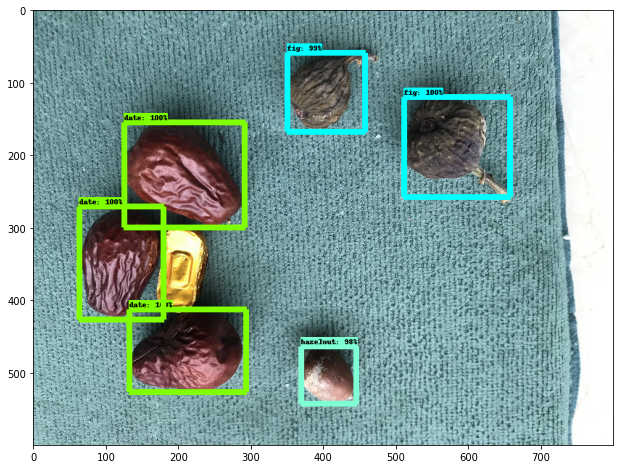

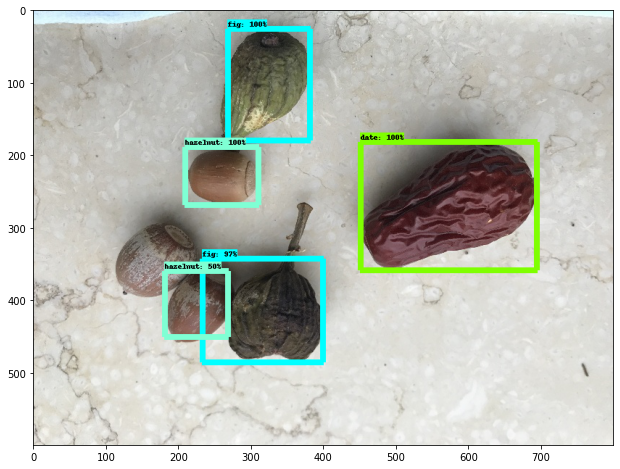

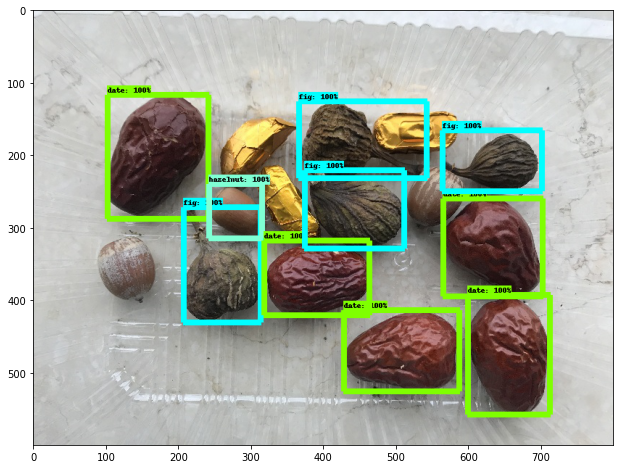

In [32]:
%cd /content/models/research/object_detection

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

# This is needed to display the images.
%matplotlib inline


from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util

print(PATH_TO_CKPT)
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=num_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(
                output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict


for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    print(str(output_dict['num_detections']) + ' num_detections are found')
    print(output_dict)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        max_boxes_to_draw=10,
        min_score_thresh=0.4,
        line_thickness=8)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)